<a href="https://www.kaggle.com/code/narberalgamma/case-study-s-p-500-leveraged-etfs?scriptVersionId=140819837" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
## Title: Case Study:S&P 500 Leveraged ETFs: A Case Study on Risk and Return
## Author: Edgar M.
## Date: 6/11/23
---
## Hypothetical Scenario
As a junior financial analyst working for an asset management firm.<br>
Asset manager asked me to lead a project for a brand-new client — this<br>
will involve everything from defining the business task all the way<br> 
through presenting data-driven recommendations. I will ask the right<br>
questions, identify all appropriate datasets and ensure their integrity,<br>
conduct analysis, create compelling data visualizations, and give<br>
recommendations to the client based on my findings. 

## The Case Study Roadmap 

- Ask
- Prepare
- Process 
- Analyze 
- Share 
- Act

## Ask
Ask phase involves defining the business problem and question that the<br>
analysis will address. Identifying the key stakeholders who will be<br>
involved in the analysis. Identifying the metrics that will be used to<br>
measure the success of the project. It also involves identifying the data<br>
sources that will be used in the analysis and determining the quality and<br>
completeness of the data.<br> 

### Key Tasks
- Identify the business task. What is the problem that is being solved?

The client is interested in investing in S&P 500 leveraged ETF's. The<br>
business task is to help the client understand the risk and return<br> 
profile of the S&P 500 leveraged ETFs. The regular unleverage S&P 500 ETF<br>
and leveraged S&P 500 ETF's have different risk and return profiles.<br> 
Hence the problem being solved is the assessment of the risk and<br>
return profile of the unleveraged S&P 500 vs the S&P 500 Leveraged ETFs.

- Determine key stakeholders.

The client is a high net worth individual who is interested in investing<br>
in S&P 500 Leveraged ETFs. Project will also be presented to the asset<br>
manager and the client's financial advisor.<br>

- What metrics will be used to measure data to achieve objective?

One metric that will be used to measure the objective is DCA (Dollar<br>
Cost Averaging). DCA reduces risk through the use of periodic purchases<br>
of a target asset. Rather than one large purchase, which can expose the<br>
investor to the risk of timing the market, DCA spreads out the risk over<br>
time. Monthly DCA will be used to measure financial performance. Metric<br>
that will be used to measure financial risk is Beta (β). Beta is a<br>
measure of the volatility of a security or portfolio compared to the<br>
market as a whole.<br>

- How can your insights help your client make decisions?

Based on the total return, Beta, and DCA analysis, the client will be<br>
able to make an informed financial decision.<br>

- What type of data will be appropriate for analysis?

There will be three datasets used in the analysis. The first dataset will<br>
be the S&P 500 index data. GSPC tracks the performance of the S&P 500<br>
index. The second dataset will be a 2X S&P 500 leveraged ETF. SSO tracks<br>
the performance of the S&P 500 index with a leverage factor of 2. The<br>
third dataset will be a 3X S&P 500 leveraged ETF. UPRO tracks the<br>
performance of the S&P 500 index with a leverage factor of 3.

- Where will data be obtained?

The data will be obtained quantmod package in R. The quantmod package<br>
provides a framework for quantitative financial modeling and trading. 


## Prepare
Prepare involves gathering data used in the analysis.

In [1]:
#load nessary packages
library(quantmod)
library(readr)
library(dplyr)
library(lubridate)
library(ggplot2) 
library(scales)
library(PerformanceAnalytics)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.       

Download GSPC S&P 500 data.<br>
Start date of S&P 500.<br>
Set end date as current system date<br>
Download data and store as an xts object named GSPC<br>
Convert xts (time-series object) to data frame

In [2]:
start_date_SP500 <- as.Date("1957-03-04")
end_date_SP500 <- Sys.Date()
getSymbols("^GSPC", src = "yahoo", from = start_date_SP500, to = end_date_SP500)
SP500_data_unclean <- as.data.frame(GSPC)

[1] "GSPC"

Download and save SSO ETF.<br>
Start date of SSO.<br>
Set end date as current system date.<br>
Download data and store as an xts object named SSO<br>
Convert xts (time-series object) to data frame.

In [3]:
start_date_SSO <- as.Date("2006-03-04")
end_date_SSO <- end_date <- Sys.Date()
getSymbols("SSO", src = "yahoo", from = start_date_SSO, to = end_date_SSO)
SSO_data_unclean <- as.data.frame(SSO)

[1] "SSO"

Download and save UPRO ETF.<br>
Very fisrt date of UPRO.<br>
Set end date as current system date.<br>
Download data and store as an xts object named UPRO<br>
Convert xts (time-series object) to data frame.

In [4]:
start_date_UPRO <- as.Date("2009-06-24")
end_date_UPRO <- end_date <- Sys.Date()
getSymbols("UPRO", src = "yahoo", from = start_date_UPRO, to = end_date_UPRO)
UPRO_data_unclean <- as.data.frame(UPRO)

[1] "UPRO"

## Process
Process involves cleaning and transforming data for analysis.

### Clean GSPC (S&P 500) Data
Assign row names to the "Date" column.<br>
Remove the row names.

In [5]:
SP500_data_unclean$Date <- rownames(SP500_data_unclean)
rownames(SP500_data_unclean) <- NULL

Create a new column "Trading day". seq_len(nrow(SP500_data_unclean))<br>
creates a sequence of integers from 1 to the number of rows in the data<br>
frame. Finally, the resulting sequence is assigned to the Trading_day<br>
column.

In [6]:
SP500_data_unclean$Trading_day <- seq_len(nrow(SP500_data_unclean))

Select Trading_day, Date, GSPC.Close, rename columns and mutate Date to date format.

In [7]:
SP500_data_clean <- select(SP500_data_unclean, Trading_day, Date, GSPC.Close) %>% 
  rename(SP500_Closing_Price = GSPC.Close) %>%
  mutate(Date = parse_date_time(Date, orders = c("mdy", "dmy", "ymd")))

View the fisrt 6 rows of the resulting SP500_data_clean dataframe.

In [8]:
head(SP500_data_clean)

,Trading_day,Date,SP500_Closing_Price
,<int>,<dttm>,<dbl>
1,1,1957-03-04,44.06
2,2,1957-03-05,44.22
3,3,1957-03-06,44.23
4,4,1957-03-07,44.21
5,5,1957-03-08,44.07
6,6,1957-03-11,43.78


### Clean SSO Data (2X S&P 500 Leveraged ETF)
Assign row names to the "Date" column.<br>
Remove the row names.

In [9]:
SSO_data_unclean$Date <- rownames(SSO_data_unclean)
rownames(SSO_data_unclean) <- NULL

Create a new column "Trading day". seq_len(nrow(SSO_data_unclean)) creates<br>
a sequence of integers from 1 to the number of rows in the data frame.<br>
Finally, the resulting sequence is assigned to the Trading_day column.

In [10]:
SSO_data_unclean$Trading_day <- seq_len(nrow(SSO_data_unclean))

Select Trading_day, Date, SSO.Close, rename columns and mutate Date to date format.

In [11]:
SSO_data_clean <- select(SSO_data_unclean, Trading_day, Date, SSO.Close) %>% 
  rename(SSO_Closing_Price = SSO.Close) %>%
  mutate(Date = parse_date_time(Date, orders = c("mdy", "dmy", "ymd")))

View the fisrt 6 rows of the resulting SSO_data_clean dataframe.

In [12]:
head(SSO_data_clean)

,Trading_day,Date,SSO_Closing_Price
,<int>,<dttm>,<dbl>
1,1,2006-06-21,8.93750
2,2,2006-06-22,8.84250
3,3,2006-06-23,8.84125
4,4,2006-06-26,8.89250
5,5,2006-06-27,8.73500
6,6,2006-06-28,8.81250


### Clean UPRO Data (3X S&P 500 Leveraged ETF)
Assign row names to the "Date" column.<br>
Remove the row names.

In [13]:
UPRO_data_unclean$Date <- rownames(UPRO_data_unclean)
rownames(UPRO_data_unclean) <- NULL

Create a new column "Trading day."seq_len(nrow(UPRO_data_unclean)) creates<br>
a sequence of integers from 1 to the number of rows in the data frame.<br>
Finally, the resulting sequence is assigned to the Trading_day column.

In [14]:
UPRO_data_unclean$Trading_day <- seq_len(nrow(UPRO_data_unclean))

Select Trading_day, Date, UPRO.Close, rename columns and mutate Date to date format.

In [15]:
UPRO_data_clean <- select(UPRO_data_unclean, Trading_day, Date, UPRO.Close) %>% 
  rename(UPRO_Closing_Price = UPRO.Close) %>%
  mutate(Date = parse_date_time(Date, orders = c("mdy", "dmy", "ymd")))

View the fisrt 6 rows of the resulting UPRO_data_clean dataframe.

In [16]:
head(UPRO_data_clean)

,Trading_day,Date,UPRO_Closing_Price
,<int>,<dttm>,<dbl>
1,1,2009-06-25,1.205556
2,2,2009-06-26,1.199306
3,3,2009-06-29,1.233333
4,4,2009-06-30,1.203889
5,5,2009-07-01,1.216806
6,6,2009-07-02,1.116389


## Analysis and Share
Analysis involves using exploratory data analysis and visualization to<br>
explore relationships in the data. Share is the act of creating<br>
visualizations and sharing them with others.<br>

Set GSPC as a hypothetical S&P 500 ETF investment. Leveraged GSPC ETFs<br>
will be compared to GSPC.<br>  

Set monthly investment amount ($).

In [17]:
Monthly_Investment_USD <- 10

### Number of Shares of S&P 500 ETF Purchased on a Monthly Basis
Calculate the investment amount based on 1957-03-05 closing price.

In [18]:
first_day_price_SP500 <- SP500_data_clean$SP500_Closing_Price[2]
Monthly_Share_1_SP500 <- Monthly_Investment_USD / first_day_price_SP500

Create data frame for first month's investment.

In [19]:
first_day_date_SP500 <- SP500_data_clean$Date[2]
first_day_price_SP500 <- SP500_data_clean$SP500_Closing_Price[2]
Monthly_Share_1_df_SP500 <- data.frame(Date = first_day_date_SP500, 
  Shares = Monthly_Share_1_SP500, 
  SP500_Closing_Price = first_day_price_SP500)

Subset data from 1957-04-01 onwards.

In [20]:
SP500_data_filtered <- SP500_data_clean %>%
  filter(Date >= as.Date("1957-04-01", format = "%Y-%m-%d"))

Create a vector of the first trading day for each month.

In [21]:
first_of_month_SP500 <- SP500_data_filtered %>% 
  group_by(year(Date), month(Date)) %>% 
  slice(1) %>% 
  pull(Date)

Calculate the investment amount for each month.

In [22]:
investment_amount_SP500 <- Monthly_Investment_USD / SP500_data_filtered$SP500_Closing_Price[match(first_of_month_SP500, SP500_data_filtered$Date)]
closing_prices_SP500 <- SP500_data_filtered$SP500_Closing_Price[match(first_of_month_SP500, SP500_data_filtered$Date)]

Create the data frame.

In [23]:
Monthly_Shares_2_df_SP500 <- data.frame(Date = first_of_month_SP500, 
  Shares = investment_amount_SP500, SP500_Closing_Price = closing_prices_SP500)

Combine Monthly_Share_1_df and Monthly_Shares_2_df into Monthly_Shares_SP500

In [24]:
Monthly_Shares_SP500 <- rbind(Monthly_Share_1_df_SP500, Monthly_Shares_2_df_SP500)

View the first 6 rows of the resulting Monthly_Shares_SP500 dataframe.

In [25]:
head(Monthly_Shares_SP500)

,Date,Shares,SP500_Closing_Price
,<dttm>,<dbl>,<dbl>
1,1957-03-05,0.2261420,44.22
2,1957-04-01,0.2265519,44.14
3,1957-05-01,0.2172968,46.02
4,1957-06-03,0.2111041,47.37
5,1957-07-01,0.2108370,47.43
6,1957-08-01,0.2092488,47.79


Create a new data frame to store cumulative shares and corresponding<br>
closing prices.

In [26]:
Sum_Shares_SP500 <- data.frame(
  # The first column is a sequence of dates, starting from the initial date
  Date = rep(c(as.Date("1957-03-05"), first_of_month_SP500), each = 1),
  # The second column is a sequence of zeroes to store cumulative shares
  Shares = numeric(length(Monthly_Shares_SP500$Shares)),
  # The third column is a sequence of zeroes to store corresponding closing prices
  SP500_Closing_Price = numeric(length(Monthly_Shares_SP500$Shares))
)

# Loop through each index of the Monthly_Shares$Shares vector
for (i in seq_along(Monthly_Shares_SP500$Shares)) {
  # Calculate the cumulative sum of shares up to the current index and store it in the Shares column
  Sum_Shares_SP500[i, "Shares"] <- sum(Monthly_Shares_SP500[1:i, "Shares"])
  # Assign the corresponding SP500_Closing_Price value to the current index
  Sum_Shares_SP500[i, "SP500_Closing_Price"] <- Monthly_Shares_SP500[i, "SP500_Closing_Price"]
}

Insert a new column called "Total_USD" into Sum_Shares dataframe.<br>
Multiply (Shares) by (SP500_Closing_Price).

In [27]:
Sum_Shares_SP500$Total_USD <- Sum_Shares_SP500$Shares * Sum_Shares_SP500$SP500_Closing_Price

View the fisrt 6 rows of the resulting Sum_Shares dataframe.

In [28]:
head(Sum_Shares_SP500)

,Date,Shares,SP500_Closing_Price,Total_USD
,<date>,<dbl>,<dbl>,<dbl>
1,1957-03-05,0.2261420,44.22,10.00000
2,1957-04-01,0.4526939,44.14,19.98191
3,1957-05-01,0.6699907,46.02,30.83297
4,1957-06-03,0.8810948,47.37,41.73746
5,1957-07-01,1.0919318,47.43,51.79033
6,1957-08-01,1.3011806,47.79,62.18342


### Daily Percent Change
#### Daily Percent Change for SSO (2x Leveraged S&P 500 ETF)
First trading day is 6/21/2006 for SSO.

Create the new data frame with Date column starting from the second row.

In [29]:
#note Year-month-day
SSO_Daily_Percent_Change_Datedf1 <- data.frame(Date = SSO_data_clean$Date[-1])

Calculate daily percent change.<br>
Exclude the first element of closing prices.

In [30]:
closing_pricesSSO <- SSO_data_clean$SSO_Closing_Price[-1]  

Exclude the last element of closing prices.

In [31]:
previous_pricesSSO <- SSO_data_clean$SSO_Closing_Price[-length(SSO_data_clean$SSO_Closing_Price)]

Calculate the daily percent change.

In [32]:
daily_changeSSO <- (closing_pricesSSO * 100 / previous_pricesSSO) - 100  

Create the new data frame.

In [33]:
SSO_Daily_Percent_Changedf2 <- data.frame(Daily_Percent_Change = daily_changeSSO)

Combine the two data frames.

In [34]:
SSO_Daily_Percent_Changedf <- cbind(SSO_Daily_Percent_Change_Datedf1, SSO_Daily_Percent_Changedf2)

View the first 6 rows of the resulting SSO_Daily_Percent_Changedf dataframe.

In [35]:
head(SSO_Daily_Percent_Changedf)

,Date,Daily_Percent_Change
,<dttm>,<dbl>
1,2006-06-22,-1.06294005
2,2006-06-23,-0.01412851
3,2006-06-26,0.57966353
4,2006-06-27,-1.77115849
5,2006-06-28,0.88723923
6,2006-06-29,4.24113172


#### Daily Percent Change for UPRO (3x Leveraged S&P 500 ETF)
First trading day is 6/21/2009 for UPRO.<br>

Create the new data frame with Date column starting from the second row.

In [36]:
#note Year-month-day
UPRO_Daily_Percent_Change_Datedf1 <- data.frame(Date = UPRO_data_clean$Date[-1])

Calculate daily percent change.<br>
Exclude the first element of closing prices.

In [37]:
closing_pricesUPRO <- UPRO_data_clean$UPRO_Closing_Price[-1]

Exclude the last element of closing prices.

In [38]:
previous_pricesUPRO <- UPRO_data_clean$UPRO_Closing_Price[-length(UPRO_data_clean$UPRO_Closing_Price)]

Calculate the daily percent change.

In [39]:
daily_changeUPRO <- (closing_pricesUPRO * 100 / previous_pricesUPRO) - 100

Create the new data frame.

In [40]:
UPRO_Daily_Percent_Changedf2 <- data.frame(Daily_Percent_Change = daily_changeUPRO)

Combine the two data frames.

In [41]:
UPRO_Daily_Percent_Changedf <- cbind(UPRO_Daily_Percent_Change_Datedf1, UPRO_Daily_Percent_Changedf2)

View the first 6 rows of the resulting UPRO_Daily_Percent_Changedf dataframe.

In [42]:
head(UPRO_Daily_Percent_Changedf)

,Date,Daily_Percent_Change
,<dttm>,<dbl>
1,2009-06-26,-0.518435
2,2009-06-29,2.837223
3,2009-06-30,-2.387350
4,2009-07-01,1.072943
5,2009-07-02,-8.252508
6,2009-07-06,0.273648


### S&P 500 Daily Percent Change Dataframes Corresponding to The Dates SSO and UPRO.
#### S&P 500 Daily Percent Change Dataframe Corresponding to The Dates of SSO.
First date from SSO_Daily_Percent_Change_Date_df1 minus one.

In [43]:
first_dateSSO <- as.Date(head(SSO_Daily_Percent_Change_Datedf1$Date, n = 1), format = "%Y-%m-%d") - 1

Filter for dates greater than first_date_SSO.

In [44]:
SP500_data_cleanSSO <- SP500_data_clean %>%
    filter(Date >= first_dateSSO)

Fisrt element is the closing price that corresponds the date of the data<br>
frame "SSO_Daily_Percent_Change_Date_df1"

In [45]:
closing_pricesSP500 <- SP500_data_cleanSSO$SP500_Closing_Price[-1] 

Exclude the last element of closing prices.

In [46]:
previous_pricesSP500 <- SP500_data_cleanSSO$SP500_Closing_Price[-length(SP500_data_cleanSSO$SP500_Closing_Price)]

Calculate the daily percent change.

In [47]:
daily_changeSP500 <- (closing_pricesSP500 * 100 / previous_pricesSP500) - 100  

Create the new data frame.

In [48]:
SP500_Daily_Percent_Changedf2 <- data.frame(Daily_Percent_Change = daily_changeSP500)  

Combine the two data frames

In [49]:
SP500_Daily_Percent_Change_SSOdf <- cbind(SSO_Daily_Percent_Change_Datedf1, SP500_Daily_Percent_Changedf2)

View the first 6 rows of the resulting SP500_Daily_Percent_Change_SSOdf<br>
dataframe. S&P 500 Daily Percent Change Dataframe corresponding to the<br>
dates of SSO. 

In [50]:
head(SP500_Daily_Percent_Change_SSOdf)

,Date,Daily_Percent_Change
,<dttm>,<dbl>
1,2006-06-22,-0.5270704
2,2006-06-23,-0.0883089
3,2006-06-26,0.4869473
4,2006-06-27,-0.9084016
5,2006-06-28,0.5487451
6,2006-06-29,2.1565004


#### S&P 500 Daily Percent Change Dataframe Corresponding to The Dates of UPRO.
First date from UPRO_Daily_Percent_Change_Date_df1 

In [51]:
first_dateUPRO <- as.Date(head(UPRO_Daily_Percent_Change_Datedf1$Date, n = 1), format = "%Y-%m-%d") 

Convert the "Date" column to Date format.<br>
This line of code does not create a new variable but rather updates the<br>
existing Date column within the SP500_Daily_Percent_Change_SSO_df data frame.

In [52]:
SP500_Daily_Percent_Change_SSOdf$Date <- as.Date(SP500_Daily_Percent_Change_SSOdf$Date, format = "%Y-%m-%d")

Filter for dates greater than or equal to first_date_UPRO

In [53]:
SP500_Daily_Percent_Change_UPROdf <- SP500_Daily_Percent_Change_SSOdf %>%
  filter(Date >= first_dateUPRO)

View the first 6 rows of the resulting SP500_Daily_Percent_Change_UPROdf<br>
dataframe. S&P 500 Daily Percent Change Dataframe corresponding to the<br>
dates of UPRO.

In [54]:
head(SP500_Daily_Percent_Change_UPROdf)

,Date,Daily_Percent_Change
,<date>,<dbl>
1,2009-06-26,-0.1477827
2,2009-06-29,0.9065139
3,2009-06-30,-0.8530756
4,2009-07-01,0.4361930
5,2009-07-02,-2.9144546
6,2009-07-06,0.2565748


### Calculate Daily Leverage and Median Daily Leverage for SSO and UPRO.
#### Calculate Daily Leverage for SSO.
Create the SSO_Lev data frame. Need to replace infinite values for SSO_LevDiv.

In [55]:
SSO_LevDiv <- data.frame(SSO_Leverage = SSO_Daily_Percent_Changedf2 / SP500_Daily_Percent_Changedf2)   

Replace Infinities in data with 2.

In [56]:
SSO_LevDiv <- do.call(data.frame,lapply(SSO_LevDiv, function(x) replace(x, is.infinite(x), 2)))

Create the SSO_Lev data frame with the desired column name.

In [57]:
SSOLev <- data.frame(SSO_Leverage = SSO_LevDiv$Daily_Percent_Change)

View the first 6 rows of the resulting SSOLev dataframe.<br>
Daily Leverage for SSO.

In [58]:
head(SSOLev)

,SSO_Leverage
,<dbl>
1,2.0166946
2,0.1599896
3,1.1904031
4,1.9497527
5,1.6168513
6,1.9666733


#### Calculate Daily Leverage for UPRO.
Makes new data frame called SP500_Daily_Percent_Change_df3.<br>
Filters out the Date column from SP500_Daily_Percent_Change_UPRO_df.

In [59]:
SP500_Daily_Percent_Changedf3 <- SP500_Daily_Percent_Change_UPROdf %>% 
  select('Daily_Percent_Change')

Create the UPRO_Lev data frame. Need to replace infinite values for UPRO_Leverage.

In [60]:
UPRO_LevDiv <- data.frame(UPRO_Leverage = UPRO_Daily_Percent_Changedf2 / SP500_Daily_Percent_Changedf3)

Replace Infinities in data with 3.

In [61]:
UPRO_LevDiv <- do.call(data.frame,lapply(UPRO_LevDiv, function(x) replace(x, is.infinite(x), 3)))

Create the UPRO_Lev data frame with the desired column name.

In [62]:
UPROLev <- data.frame(UPRO_Leverage = UPRO_LevDiv$Daily_Percent_Change)

View the first 6 rows of the resulting UPROLev dataframe.<br>
Daily Leverage for UPRO.

In [63]:
head(UPROLev)

,UPRO_Leverage
,<dbl>
1,3.508089
2,3.129817
3,2.798521
4,2.459789
5,2.831579
6,1.066543


#### Filter Out Median Daily Leverage For SSO and UPRO.
Median Daily Leverage for SSO.

In [64]:
MedianSSO <- SSOLev %>%
  summarise(Median_Lev_SSO = median(SSO_Leverage))

head(MedianSSO)

,Median_Lev_SSO
,<dbl>
1,1.971213


Median Daily Leverage for UPRO.

In [65]:
MedianUPRO <- UPROLev %>%
  summarise(Median_Lev_UPRO = median(UPRO_Leverage))

head(MedianUPRO)

,Median_Lev_UPRO
,<dbl>
1,2.966378


### Create Daily Percent Change For S&P 500 (1x, 2x, 3x).
#### Create Daily Percent Change Dataframe For 1X S&P 500.
Create the new data frame with date column starting from the second row.

In [66]:
#note Year-month-day
SP500_Daily_Percent_Change_Datedf1 <- data.frame(Date = SP500_data_clean$Date[-1])

Calculate daily percent change.<br>
Exclude the first element of closing prices.

In [67]:
closing_pricesSP500 <- SP500_data_clean$SP500_Closing_Price[-1] 

Exclude the last element of closing prices.

In [68]:
previous_pricesSP500 <- SP500_data_clean$SP500_Closing_Price[-length(SP500_data_clean$SP500_Closing_Price)]  

Calculate the daily percent change.

In [69]:
daily_changeSP500 <- (closing_pricesSP500 * 100 / previous_pricesSP500) - 100

Create the new data frame.

In [70]:
SP500_Daily_Percent_Changedf2 <- data.frame(Daily_Percent_Change = daily_changeSP500)

Combine the two data frames.

In [71]:
SP500_Daily_Percent_Changedf <- cbind(SP500_Daily_Percent_Change_Datedf1, SP500_Daily_Percent_Changedf2)

#### Create Daily Percent Change Dataframe For S&P 500 (1x, 2x, 3x).
To calculate the daily percent change for the S&P 500 (1x, 2x, 3x)<br>
dataframes, one might be tempted to multiply the daily percent change of<br>
the 1X S&P 500 by 2 and 3, respectively. However, this method is not<br>
entirely accurate due to the daily rebalancing of leverage ETFs. Which<br>
introduces a tracking error between the non-leveraged and leveraged ETFs.<br>
This error causes a small deviation from the target leverage of 2 and 3.<br>
Therefore, a more accurate approach is to calculate the median leverage<br>
for the 2X and 3X datasets, then multiply it by the daily percent change<br>
of the 1X S&P 500. This method takes into account the varying leverage<br>
ratios of the ETFs and provides a more accurate representation of the<br>
daily percent change for the S&P 500 (2x, 3x).

In [72]:
Lev_Percent_df <- SP500_Daily_Percent_Changedf %>%
  # Calculate the product of Median_Lev_SSO and Daily_Percent_Change
  mutate(SP500_2X_DailyPercent = MedianSSO$Median_Lev_SSO * Daily_Percent_Change,
  # Calculate the product of Median_Lev_UPRO and Daily_Percent_Change
         SP500_3X_DailyPercent = MedianUPRO$Median_Lev_UPRO * Daily_Percent_Change) %>%
  # Select specific columns to keep in the resulting data frame
  select(Date, Daily_Percent_Change, SP500_2X_DailyPercent, SP500_3X_DailyPercent) %>% 
  # Rename selected columns
  rename(SP500_DailyPercent = Daily_Percent_Change)

View the first 6 rows of the resulting Lev_Percent_df dataframe.

In [73]:
head(Lev_Percent_df)

,Date,SP500_DailyPercent,SP500_2X_DailyPercent,SP500_3X_DailyPercent
,<dttm>,<dbl>,<dbl>,<dbl>
1,1957-03-05,0.36314081,0.71582807,1.07721287
2,1957-03-06,0.02261041,0.04456994,0.06707101
3,1957-03-07,-0.04521921,-0.08913672,-0.13413727
4,1957-03-08,-0.31666906,-0.62422233,-0.93936010
5,1957-03-11,-0.65804610,-1.29714935,-1.95201339
6,1957-03-12,-0.06852165,-0.13507081,-0.20326112


### Create Closing Price Dataframe For S&P 500 (1x, 2x, 3x).
#### Create Closing Price Dataframe For 1X S&P 500.
Filter out fisrt row from SP500_data_clean.

In [74]:
SP500_data_clean2 <- SP500_data_clean[-1,]

#### Create Closing Price Dataframe for 2X Leveraged S&P 500.
Calculates the daily closing prices of a leveraged S&P 500 ETF by<br>
applying a cumulative product function to the daily percentage changes in<br>
the ETF's value, starting from the first day's price.

In [75]:
SP500_2XClosingPrice_df2 <- data.frame(SP500_2XClosingPrice = Reduce(function(x, y) x * (100 + y) / 100, Lev_Percent_df$SP500_2X_DailyPercent, accumulate = TRUE, init = first_day_price_SP500))

Remove fisrt row from SP500_2XClosingPrice_df2.

In [76]:
SP500_2XClosingPrice_df2 <- SP500_2XClosingPrice_df2[-1,]

Make dataframe and rename column as SP500_2XClosing_Price.

In [77]:
SP500_2XClosingPrice_df <- data.frame(SP500_2XClosingPrice_df2)  %>% 
  rename(SP500_2XClosing_Price = SP500_2XClosingPrice_df2)

#### Create Closing Price Dataframe For 3X Leveraged S&P 500.
Same procedure as SP500_2XClosingPrice_df2, but now for 3X leverage.

In [78]:
SP500_3XClosingPrice_df2 <- data.frame(SP500_3XClosingPrice = Reduce(function(x, y) x * (100 + y) / 100, Lev_Percent_df$SP500_3X_DailyPercent, accumulate = TRUE, init = first_day_price_SP500))

Remove fisrt row from SP500_3XClosingPrice_df2.

In [79]:
SP500_3XClosingPrice_df2 <- SP500_3XClosingPrice_df2[-1,]

Make dataframe and rename column to SP500_3XClosing_Price.

In [80]:
SP500_3XClosingPrice_df <- data.frame(SP500_3XClosingPrice_df2)  %>% 
  rename(SP500_3XClosing_Price = SP500_3XClosingPrice_df2)

#### Dataframe Closing Price for S&P 500 (1x, 2x, 3x).
Combine SP500_data_clean2, SP500_2XClosingPrice_df, SP500_3XClosingPrice_df

In [81]:
SP500_ALL_ClosingPrices <- cbind(SP500_data_clean2, SP500_2XClosingPrice_df, SP500_3XClosingPrice_df)

View the first 6 rows of the resulting SP500_ALL_ClosingPrices dataframe.

In [82]:
head(SP500_ALL_ClosingPrices)

,Trading_day,Date,SP500_Closing_Price,SP500_2XClosing_Price,SP500_3XClosing_Price
,<int>,<dttm>,<dbl>,<dbl>,<dbl>
2,2,1957-03-05,44.22,44.53654,44.69634
3,3,1957-03-06,44.23,44.55639,44.72632
4,4,1957-03-07,44.21,44.51667,44.66633
5,5,1957-03-08,44.07,44.23879,44.24675
6,6,1957-03-11,43.78,43.66495,43.38305
7,7,1957-03-12,43.75,43.60597,43.29487


### Plot Closing Prices for S&P 500 (1x, 2x, 3x).
The line for 1X S&P 500 is barely noticible in the graph.2X S&P 500 and<br>
3X S&P 500 rise very quickly when compared to 1X S&P 500.3X S&P 500 rises<br>
the quickest of the three. Therefore it is best to graph in log scale.

In [83]:
SP500_ALL_ClosingPrices_DateConvert <- SP500_ALL_ClosingPrices
SP500_ALL_ClosingPrices_DateConvert$Date <- as.Date(SP500_ALL_ClosingPrices_DateConvert$Date, format = "%Y-%m-%d")

SP500_ALL_ClosingPrices_plot <- ggplot(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = SP500_Closing_Price), group=1) +
  geom_line(aes(color = "SP500")) +
  geom_line(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = SP500_2XClosing_Price, color = "SP500_2X"), group = 1) +
  geom_line(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = SP500_3XClosing_Price, color = "SP500_3X"), group = 1) +
  scale_y_continuous(breaks = c(0,4000 ,50000,75000, 10000, 100000, 150000, 200000, 250000, 300000, 320000),
                     labels = c("0", "4K", "50K","75K", "10K", "100K", "150K", "200K", "250K", "300K", "320K")) +
  labs(y = element_text("Price USD", size = 16, face = "bold"), x = element_text("Date", size = 16, face = "bold")) +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  scale_color_manual(values = c("SP500" = "red", "SP500_2X" = "blue", "SP500_3X" = "darkgreen"),
                     labels = c("SP500", "SP500_2X", "SP500_3X")) +
  guides(color = guide_legend(title = "Color")) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14)) +
  ggtitle("Price USD for SP500, SP500_2X, AND SP500_3X")


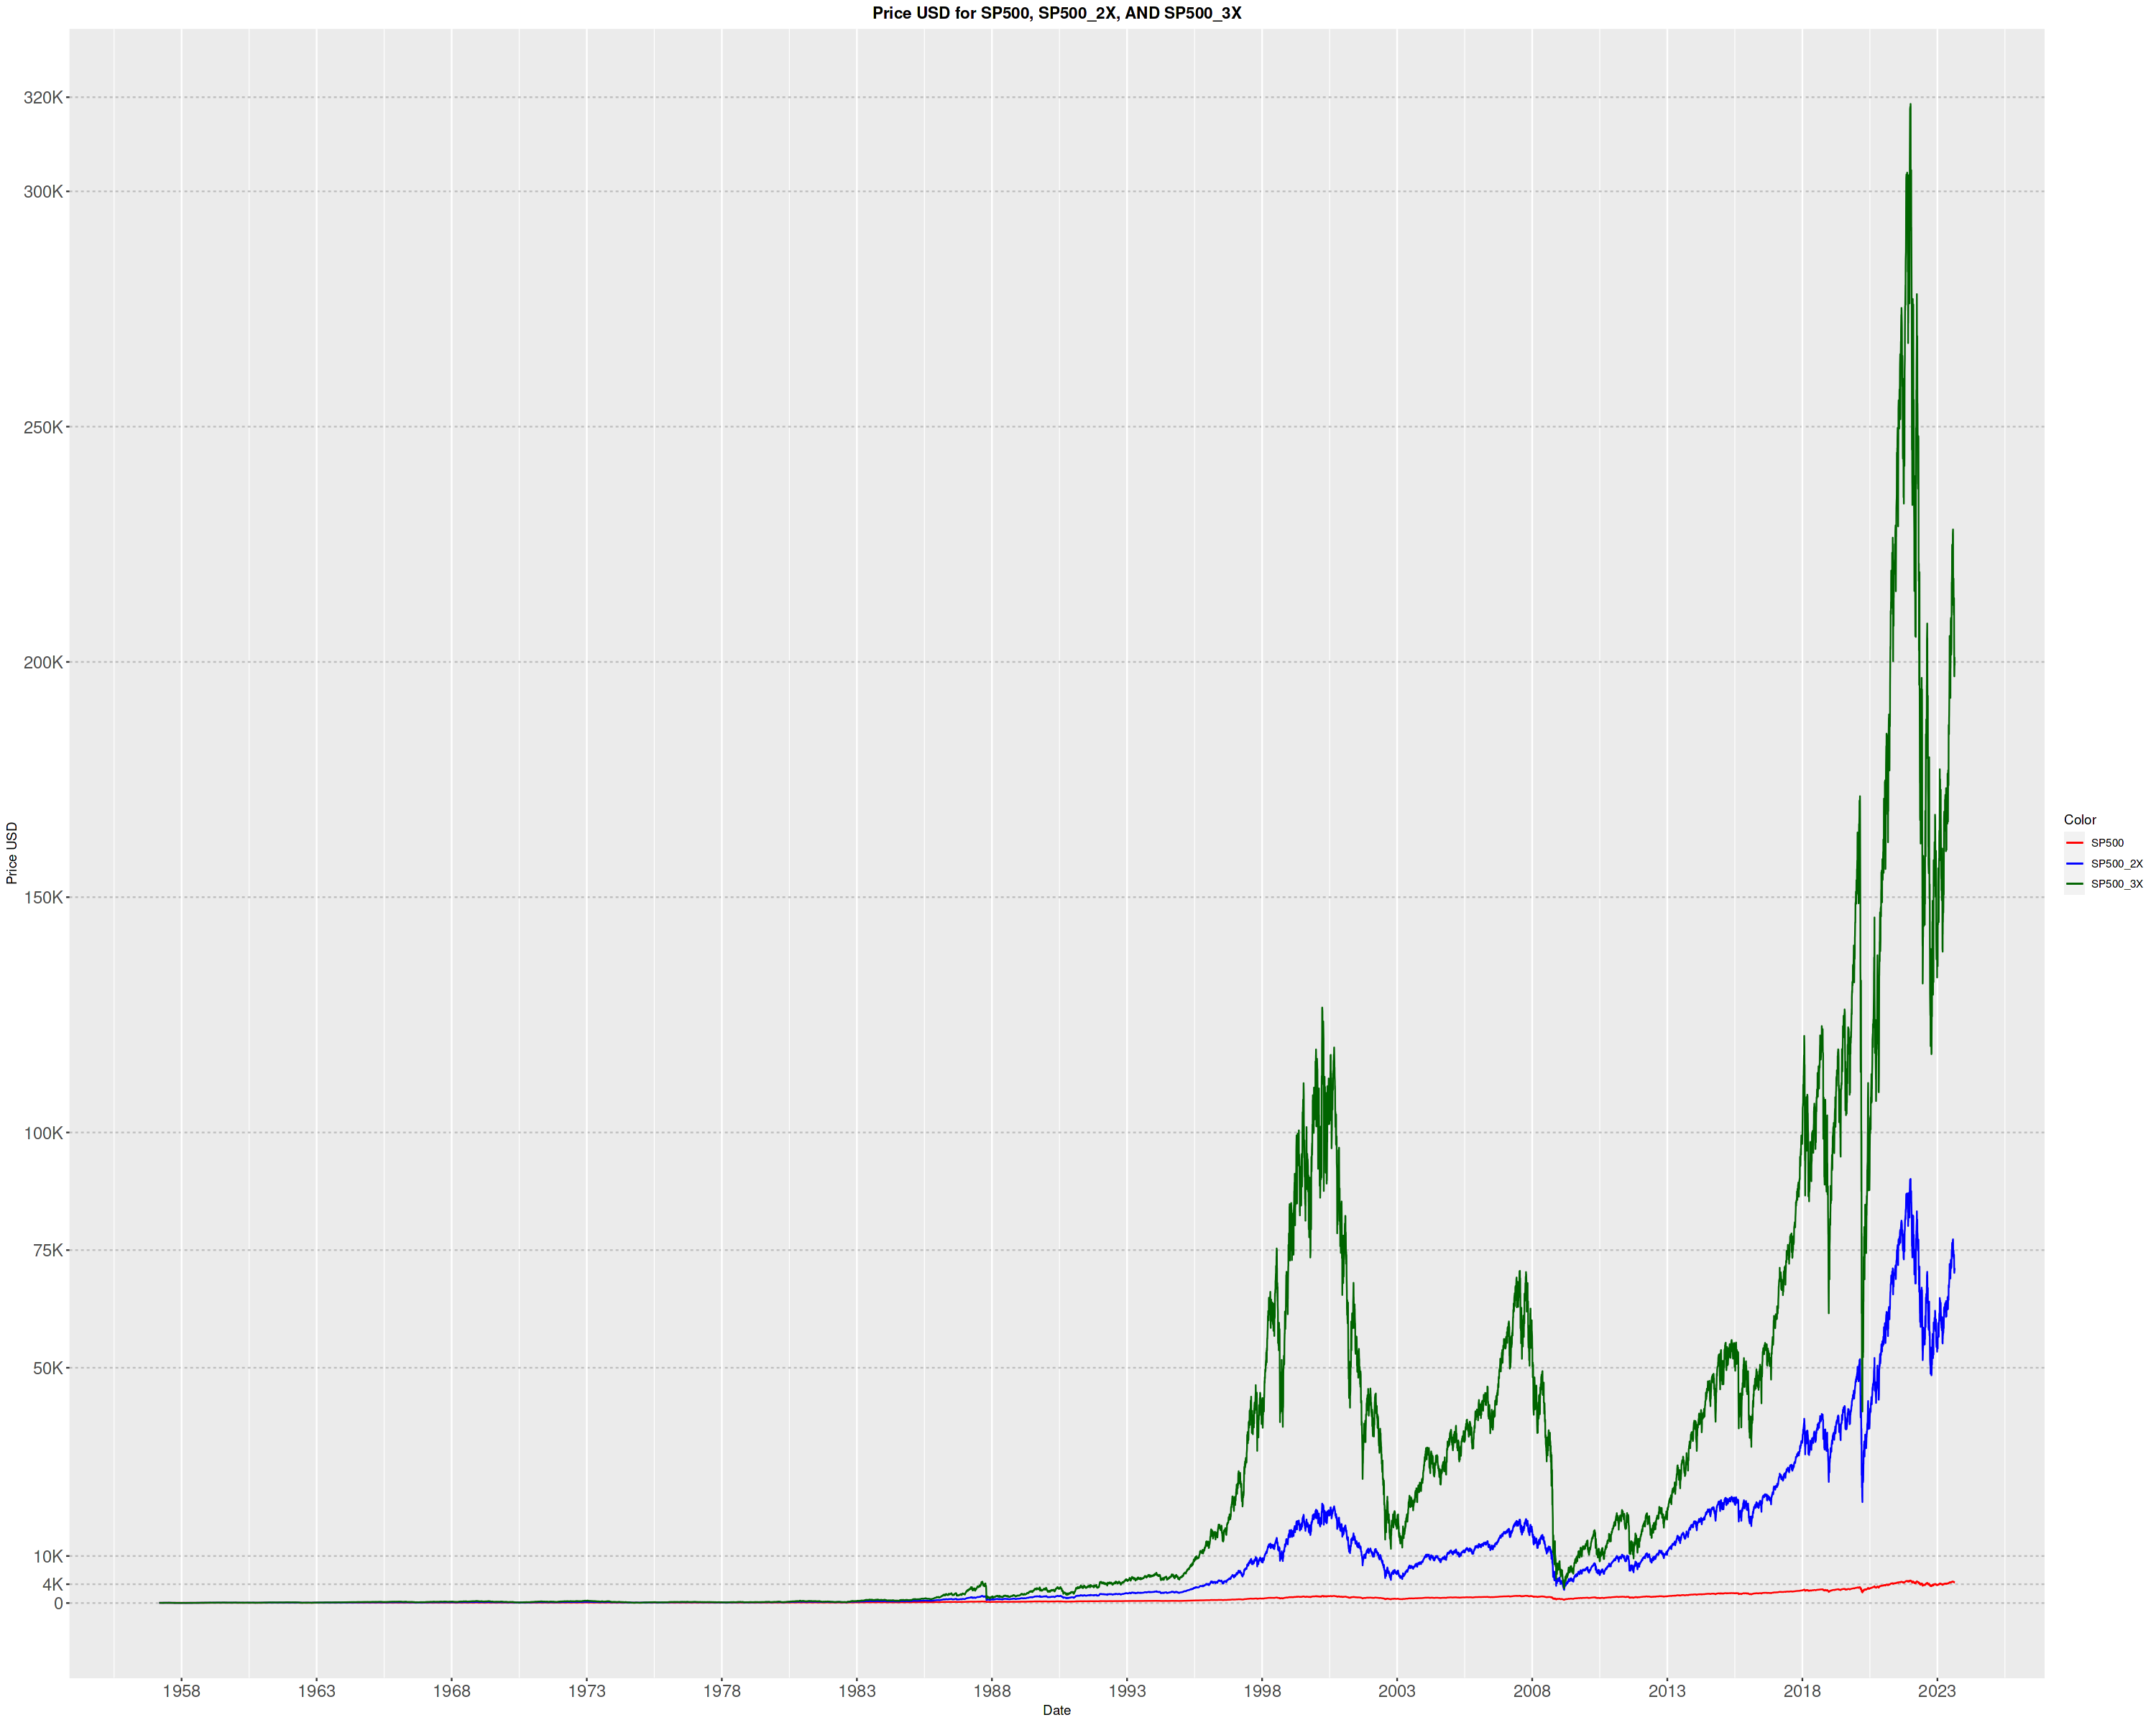

In [84]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_ALL_ClosingPrices_plot)

### Plot Closing Prices for S&P 500 (1x, 2x, 3x) in Log Scale.
Now in log scale, the graph is more readible. 

In [85]:
SP500_ALL_ClosingPrices_plot_log10 <- ggplot(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = log10(SP500_Closing_Price)), group=1) +
  geom_line(aes(color = "SP500")) +
  geom_line(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = log10(SP500_2XClosing_Price), color = "SP500_2X"), group = 1) +
  geom_line(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = log10(SP500_3XClosing_Price), color = "SP500_3X"), group = 1) +
  scale_y_continuous(breaks = c(1.477, 2, 3, 3.602, 4, 4.875, 5, 5.301, 5.477),
                     labels = c("30" ,"100", "1K", "4K", "10K", "75K", "100K", "200K", "300K")) +
  labs(y = element_text("log10(Price USD)", size = 16, face = "bold"), x = element_text("Date", size = 16, face = "bold")) +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  scale_color_manual(values = c("SP500" = "red", "SP500_2X" = "blue", "SP500_3X" = "darkgreen"),
                     labels = c("SP500", "SP500_2X", "SP500_3X")) +
  guides(color = guide_legend(title = "Color")) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14)) +
  ggtitle("log10(Price USD) for SP500, SP500_2X, AND SP500_3X")

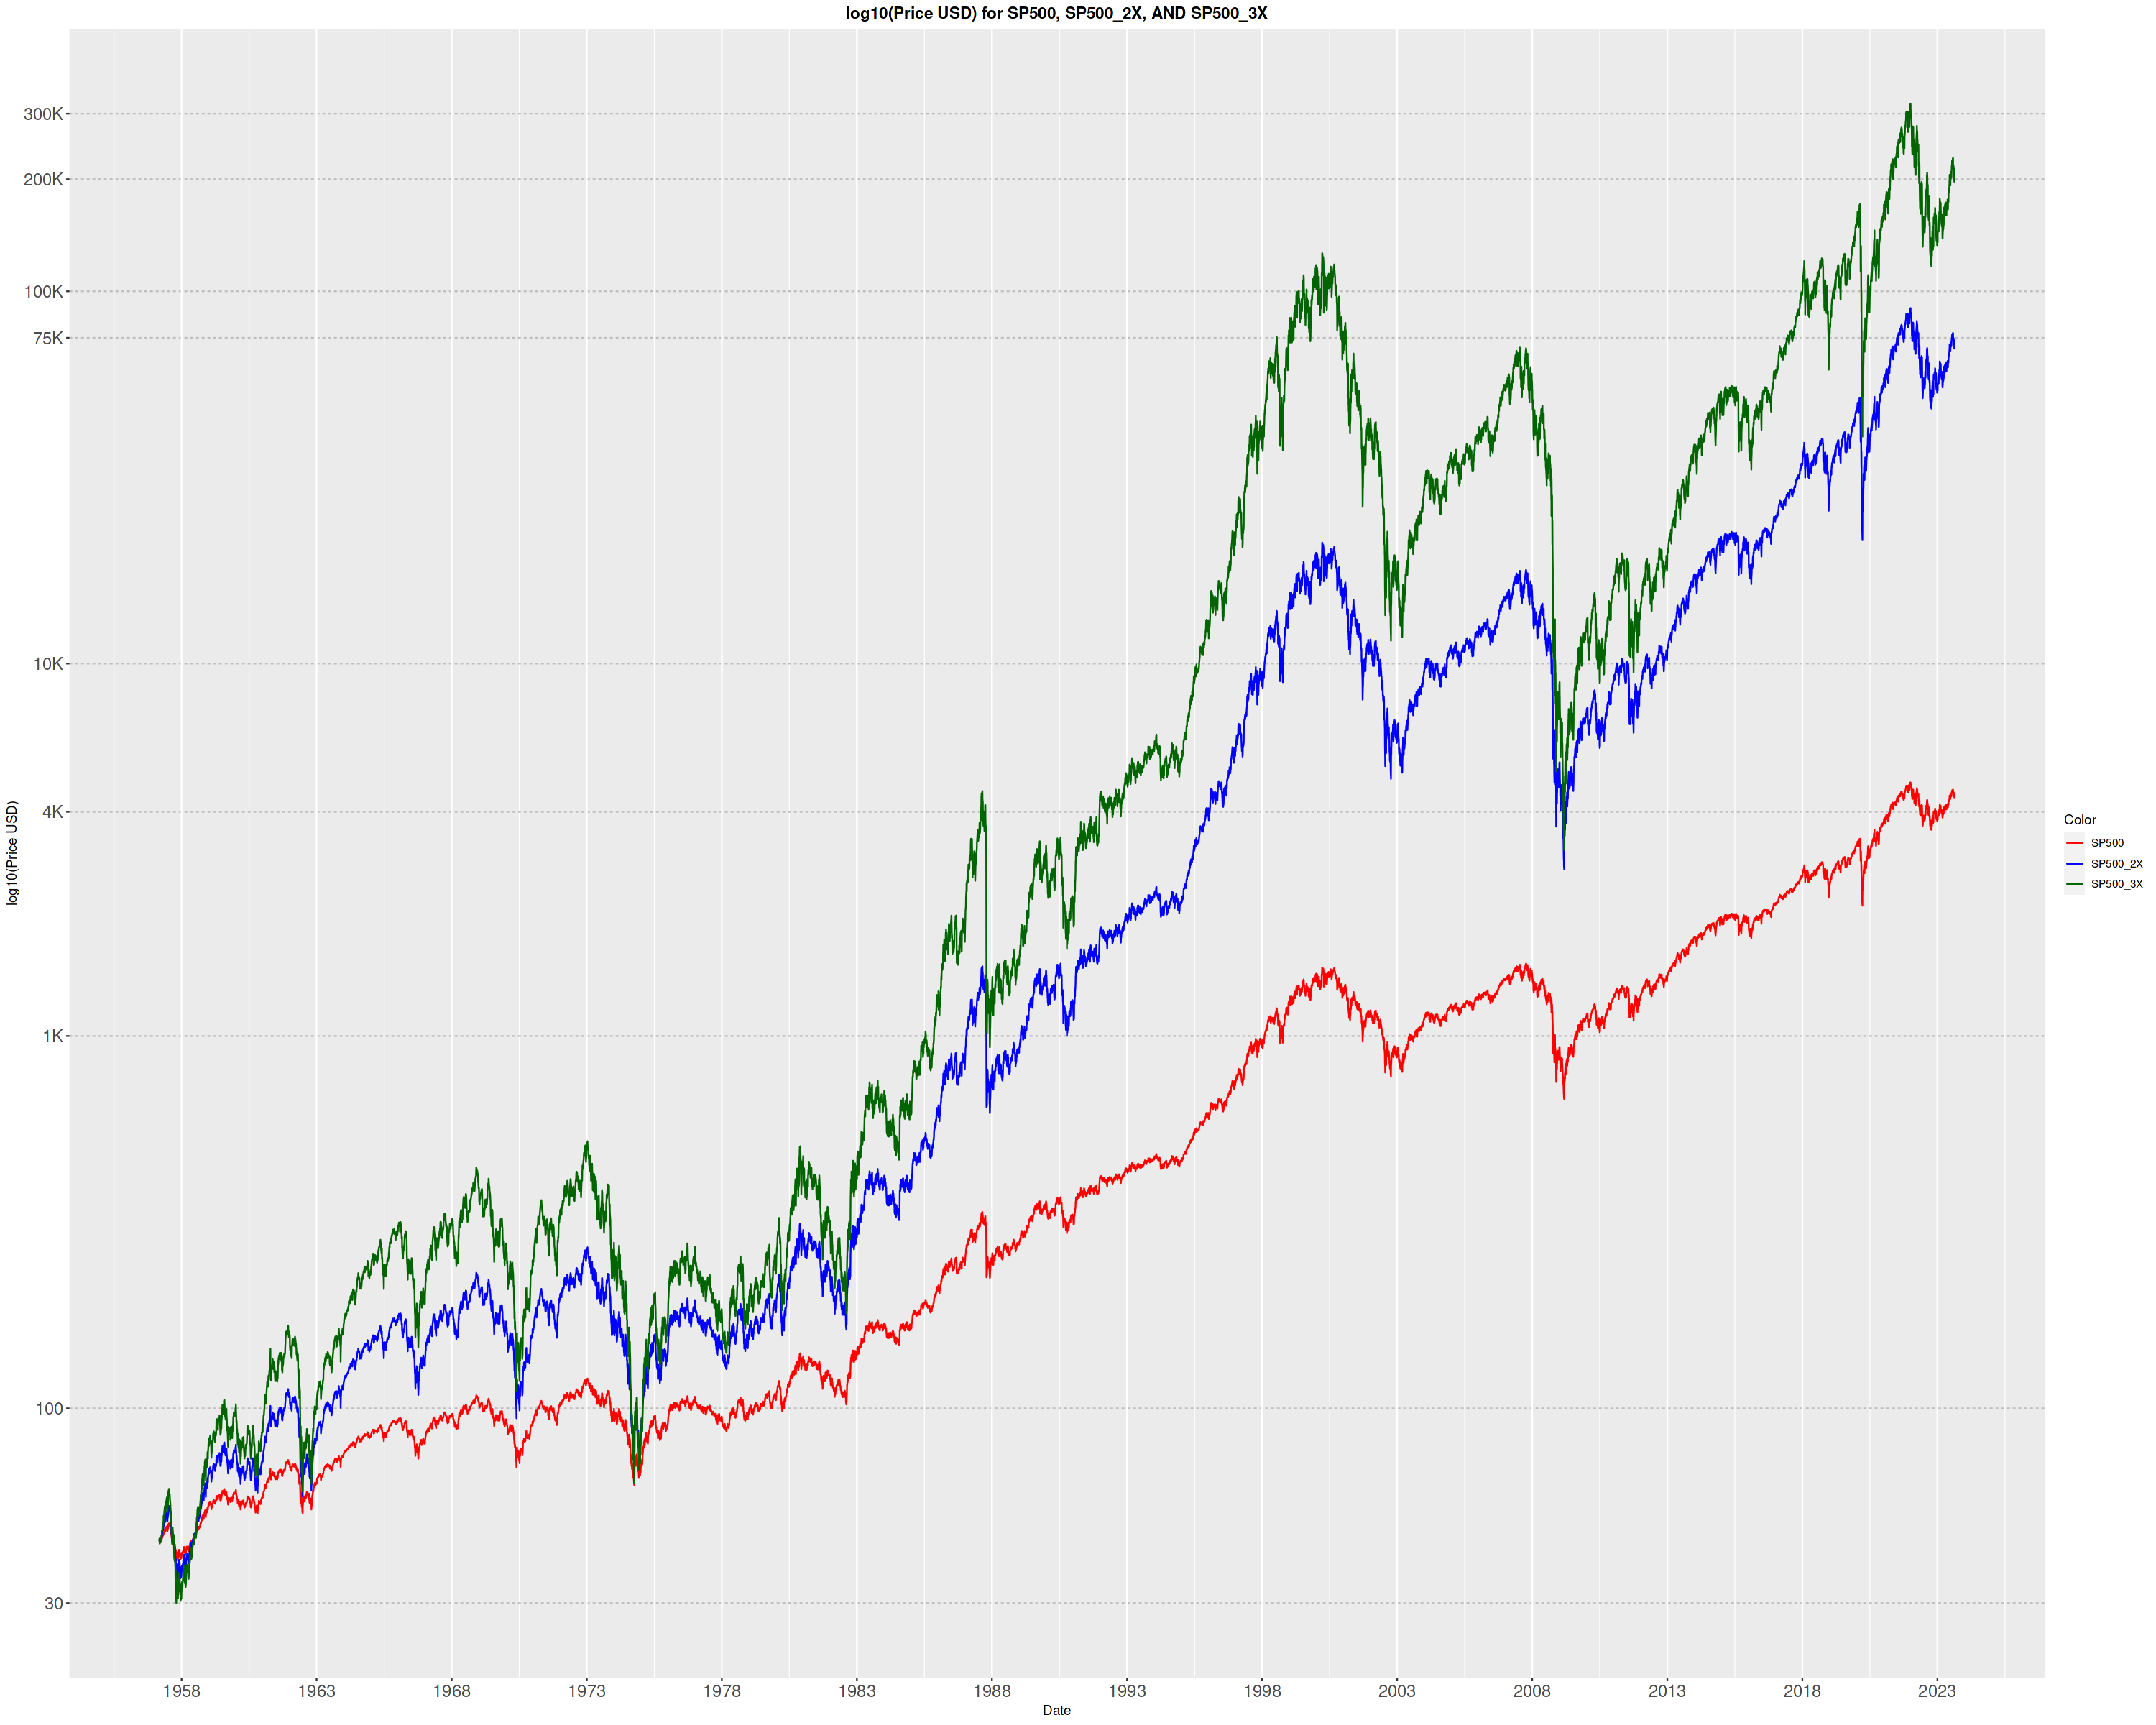

In [86]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_ALL_ClosingPrices_plot_log10)

### Number of Shares of S&P 500 Leveraged ETF purchased on a Monthly Basis
Now that the closing prices for S&P 500 (1x, 2x, 3x) are known. The<br>
number of shares bought on a monthly basis for each leverage ETF can be<br>
calculated. The number of shares bought is based on Monthly_Investment_USD<br>
amount and the closing price for each leverage ETF. 

#### Number of Shares of S&P 500 2X Leveraged ETF purchased on a Monthly Basis
Calculate the investment amount based on 1957-03-05 price.

In [87]:
first_day_price_SP5002X <- SP500_ALL_ClosingPrices$SP500_2XClosing_Price[1]
Monthly_Share_1_SP5002X <- Monthly_Investment_USD / first_day_price_SP5002X

Create data frame for first month's investment.

In [88]:
first_day_date_SP5002X <- SP500_ALL_ClosingPrices$Date[1]
first_day_price_SP5002X <- SP500_ALL_ClosingPrices$SP500_2XClosing_Price[1]
Monthly_Share_1_df_SP5002X <- data.frame(Date = first_day_date_SP5002X, 
  Shares2X = Monthly_Share_1_SP5002X, 
  SP500_2XClosing_Price = first_day_price_SP5002X)

Subset data from 1957-04-01 onwards.

In [89]:
SP500_data_filtered2X <- SP500_ALL_ClosingPrices %>%
  filter(Date >= as.Date("1957-04-01", format = "%Y-%m-%d"))

Create a vector of the first trading day for each month.

In [90]:
first_of_month_SP5002X <- SP500_data_filtered2X %>% 
  group_by(year(Date), month(Date)) %>% 
  slice(1) %>% 
  pull(Date)

Calculate the investment amount for each month.

In [91]:
investment_amount_SP5002X <- Monthly_Investment_USD / SP500_data_filtered2X$SP500_2XClosing_Price[match(first_of_month_SP5002X, SP500_data_filtered2X$Date)]
closing_prices_SP5002X <- SP500_data_filtered2X$SP500_2XClosing_Price[match(first_of_month_SP5002X, SP500_data_filtered2X$Date)]

Create data frame for monthly investment.

In [92]:
Monthly_Shares_2_df_SP5002X <- data.frame(Date = first_of_month_SP5002X, 
  Shares2X = investment_amount_SP5002X, SP500_2XClosing_Price = closing_prices_SP5002X)

Combine Monthly_Share_1_df and Monthly_Shares_2_df into Monthly_Shares_SP5002X_df.

In [93]:
Monthly_Shares_SP5002X <- rbind(Monthly_Share_1_df_SP5002X, Monthly_Shares_2_df_SP5002X)

Create a new data frame to store cumulative shares and corresponding closing prices.

In [94]:
Sum_Shares_SP5002X <- data.frame(
  # The first column is a sequence of dates, starting from the initial date
  Date = rep(c(as.Date("1957-03-05"), first_of_month_SP5002X), each = 1),
  # The second column is a sequence of zeroes to store cumulative shares
  Shares2X = numeric(length(Monthly_Shares_SP5002X$Shares2X)),
  # The third column is a sequence of zeroes to store corresponding closing prices
  SP500_2XClosing_Price = numeric(length(Monthly_Shares_SP5002X$Shares2X))
)

# Loop through each index of the Monthly_Shares$Shares vector
for (i in seq_along(Monthly_Shares_SP5002X$Shares2X)) {
  # Calculate the cumulative sum of shares up to the current index and store it in the Shares2X column
  Sum_Shares_SP5002X[i, "Shares2X"] <- sum(Monthly_Shares_SP5002X[1:i, "Shares2X"])
  # Assign the corresponding SP500_Closing_Price value to the current index
  Sum_Shares_SP5002X[i, "SP500_2XClosing_Price"] <- Monthly_Shares_SP5002X[i, "SP500_2XClosing_Price"]
}

Insert a new column called "Total_USD" into Sum_Shares dataframe.
Multiply (Shares) by (SP500_Closing_Price).

In [95]:
Sum_Shares_SP5002X$Total_USD2X <- Sum_Shares_SP5002X$Shares2X * Sum_Shares_SP5002X$SP500_2XClosing_Price

#### Number of shares of S&P 500 3X Leveraged ETF Purchased on a Monthly Basis.
Calculate the investment amount based on 1957-03-05 price.

In [96]:
first_day_price_SP5003X <- SP500_ALL_ClosingPrices$SP500_3XClosing_Price[1]
Monthly_Share_1_SP5003X <- Monthly_Investment_USD / first_day_price_SP5003X

Create data frame for first month's investment

In [97]:
first_day_date_SP5003X <- SP500_ALL_ClosingPrices$Date[1]
first_day_price_SP5003X <- SP500_ALL_ClosingPrices$SP500_3XClosing_Price[1]
Monthly_Share_1_df_SP5003X <- data.frame(Date = first_day_date_SP5003X, 
  Shares3X = Monthly_Share_1_SP5003X, 
  SP500_3XClosing_Price = first_day_price_SP5003X)

Subset data from 1957-04-01 onwards.

In [98]:
SP500_data_filtered3X <- SP500_ALL_ClosingPrices %>%
  filter(Date >= as.Date("1957-04-01", format = "%Y-%m-%d"))

Create a vector of the first trading day for each month.

In [99]:
first_of_month_SP5003X <- SP500_data_filtered3X %>% 
  group_by(year(Date), month(Date)) %>% 
  slice(1) %>% 
  pull(Date)

Calculate the investment amount for each month.

In [100]:
investment_amount_SP5003X <- Monthly_Investment_USD / SP500_data_filtered3X$SP500_3XClosing_Price[match(first_of_month_SP5003X, SP500_data_filtered3X$Date)]
closing_prices_SP5003X <- SP500_data_filtered3X$SP500_3XClosing_Price[match(first_of_month_SP5003X, SP500_data_filtered3X$Date)]

Create data frame for monthly investment.

In [101]:
Monthly_Shares_2_df_SP5003X <- data.frame(Date = first_of_month_SP5003X, 
  Shares3X = investment_amount_SP5003X, SP500_3XClosing_Price = closing_prices_SP5003X)

Combine Monthly_Share_1_df and Monthly_Shares_2_df into Monthly_Shares_SP5003X_df.

In [102]:
Monthly_Shares_SP5003X <- rbind(Monthly_Share_1_df_SP5003X, Monthly_Shares_2_df_SP5003X)

Create a new data frame to store cumulative shares and corresponding closing prices.

In [103]:
Sum_Shares_SP5003X <- data.frame(
  # The first column is a sequence of dates, starting from the initial date
  Date = rep(c(as.Date("1957-03-05"), first_of_month_SP5003X), each = 1),
  # The second column is a sequence of zeroes to store cumulative shares
  Shares3X = numeric(length(Monthly_Shares_SP5003X$Shares3X)),
  # The third column is a sequence of zeroes to store corresponding closing prices
  SP500_3XClosing_Price = numeric(length(Monthly_Shares_SP5003X$Shares3X))
)

# Loop through each index of the Monthly_Shares$Shares vector
for (i in seq_along(Monthly_Shares_SP5003X$Shares3X)) {
  # Calculate the cumulative sum of shares up to the current index and store it in the Shares2X column
  Sum_Shares_SP5003X[i, "Shares3X"] <- sum(Monthly_Shares_SP5003X[1:i, "Shares3X"])
  # Assign the corresponding SP500_Closing_Price value to the current index
  Sum_Shares_SP5003X[i, "SP500_3XClosing_Price"] <- Monthly_Shares_SP5003X[i, "SP500_3XClosing_Price"]
}

Insert a new column called "Total_USD" into Sum_Shares dataframe.<br>
Multiply (Shares) by (SP500_Closing_Price).

In [104]:
Sum_Shares_SP5003X$Total_USD3X <- Sum_Shares_SP5003X$Shares3X * Sum_Shares_SP5003X$SP500_3XClosing_Price

#### Summary of Total USD Value for S&P 500 (1X, 2X, 3X).

In [105]:
SP500_select <- Sum_Shares_SP500 %>%
  select(Date, Total_USD) %>%
  rename(Total_USD_SP500 = Total_USD) 
  
SP500_select2X <- Sum_Shares_SP5002X %>%
  select(Total_USD2X) %>%
  rename(Total_USD_SP5002X = Total_USD2X)  

SP500_select3X <- Sum_Shares_SP5003X %>%
  select(Total_USD3X) %>%
  rename(Total_USD_SP5003X = Total_USD3X) 

SP500_ALL <- cbind(SP500_select, SP500_select2X, SP500_select3X)

View first 6 rows of SP500_ALL. Dataframe shows the total USD value of<br>
the investment in S&P 500, 1X, 2X and 3X ETFs.

In [106]:
head(SP500_ALL)

,Date,Total_USD_SP500,Total_USD_SP5002X,Total_USD_SP5003X
,<date>,<dbl>,<dbl>,<dbl>
1,1957-03-05,10.00000,10.00000,10.00000
2,1957-04-01,19.98191,19.96263,19.94114
3,1957-05-01,30.83297,31.66689,32.54730
4,1957-06-03,41.73746,43.50931,45.41433
5,1957-07-01,51.79033,53.60038,55.52911
6,1957-08-01,62.18342,64.37823,66.70279


### Plot of Total USD Value for S&P 500, 1X, 2X, and 3X ETFs.
Graph shows the total USD value of the investment in S&P 500, 1X, 2X and<br>
3X ETFs. The investment amount is 10 dollars per month. The monthly investment<br>
amount doesn't matter. If the monthly amount is 100 dollars, then the total USD<br>
value will be 10 times higher. The graph retains the same shape and trend<br>
regardless of the monthly investment amount. 

In [107]:
SP500_ALL_plot <- ggplot(data = SP500_ALL, aes(x = Date, y = Total_USD_SP500), group=1) +
  geom_line(aes(color = "SP500")) +
  geom_line(data = SP500_ALL, aes(x = Date, y = Total_USD_SP5002X, color = "SP500_2X"), group = 1) +
  geom_line(data = SP500_ALL, aes(x = Date, y = Total_USD_SP5003X, color = "SP500_3X"), group = 1) +
  scale_y_continuous(breaks = c(10, 100000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000),
                     labels = c("10", "100K", "1M", "2M", "3M", "4M", "5M", "6M", "7M")) +
  labs(y = "Total USD", x = "Date") +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  scale_color_manual(values = c("SP500" = "red", "SP500_2X" = "blue", "SP500_3X" = "darkgreen"),
                     labels = c("SP500", "SP500_2X", "SP500_3X")) +
  guides(color = guide_legend(title = "Color")) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16)) +
  ggtitle("Total USD for SP500, SP500_2X, AND SP500_3X")

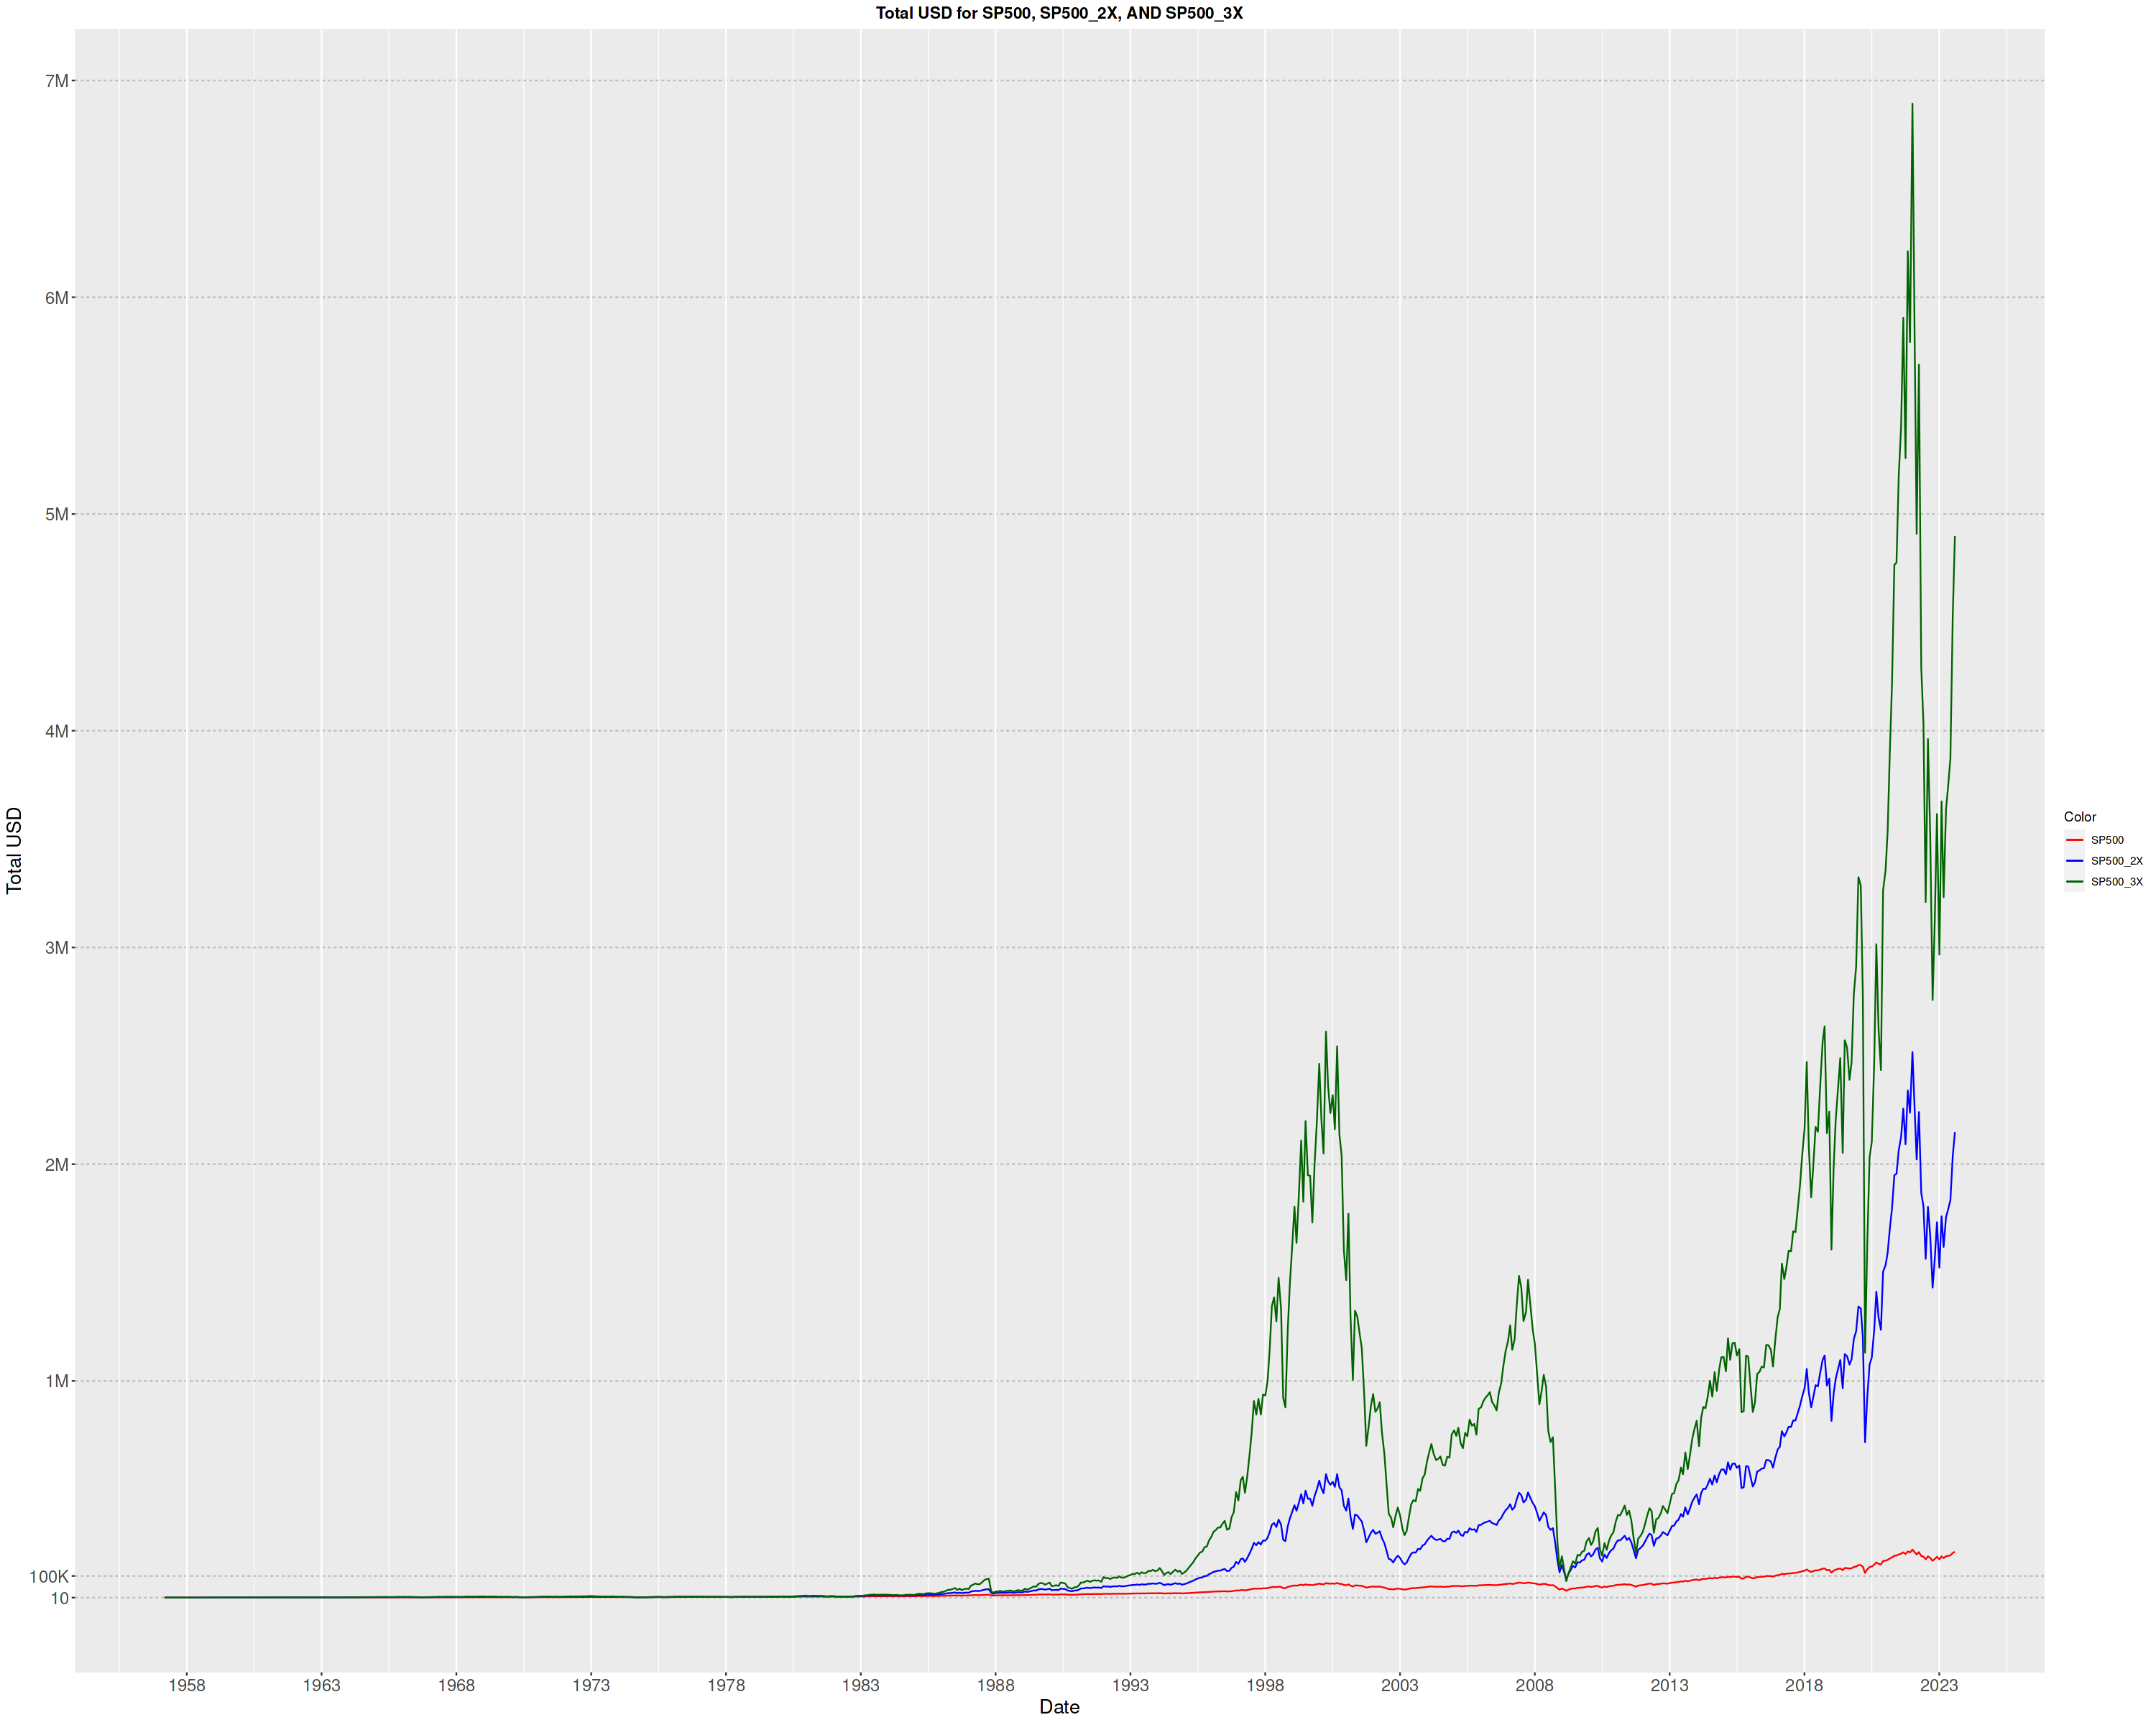

In [108]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_ALL_plot)

As with "Price USD for SP500, SP500_2X, AND SP500_3X" graph, the total<br>
USD value rises exponentially. Therefore, it is best to graph in log<br>
scale. The graph is more readible in log scale.

In [109]:
SP500_ALL_plot_log10 <- ggplot(data = SP500_ALL, aes(x = Date, y = Total_USD_SP500), group=1) +
  geom_line(aes(color = "SP500")) +
  geom_line(data = SP500_ALL, aes(x = Date, y = Total_USD_SP5002X, color = "SP500_2X"), group = 1) +
  geom_line(data = SP500_ALL, aes(x = Date, y = Total_USD_SP5003X, color = "SP500_3X"), group = 1) +
  scale_y_log10(breaks = c(10, 100, 1000, 10000, 100000, 200000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000),
                labels = c("10", "100", "1K", "10K", "100K", "200K", "1M", "2M", "3M", "4M", "5M", "6M", "7M")) +
  labs(y = "Total USD Log Base 10", x = "Date") +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  scale_color_manual(values = c("SP500" = "red", "SP500_2X" = "blue", "SP500_3X" = "darkgreen"),
                     labels = c("SP500", "SP500_2X", "SP500_3X")) +
  guides(color = guide_legend(title = "Color")) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16)) +
  ggtitle("log10(Total USD) for SP500, SP500_2X, AND SP500_3X")

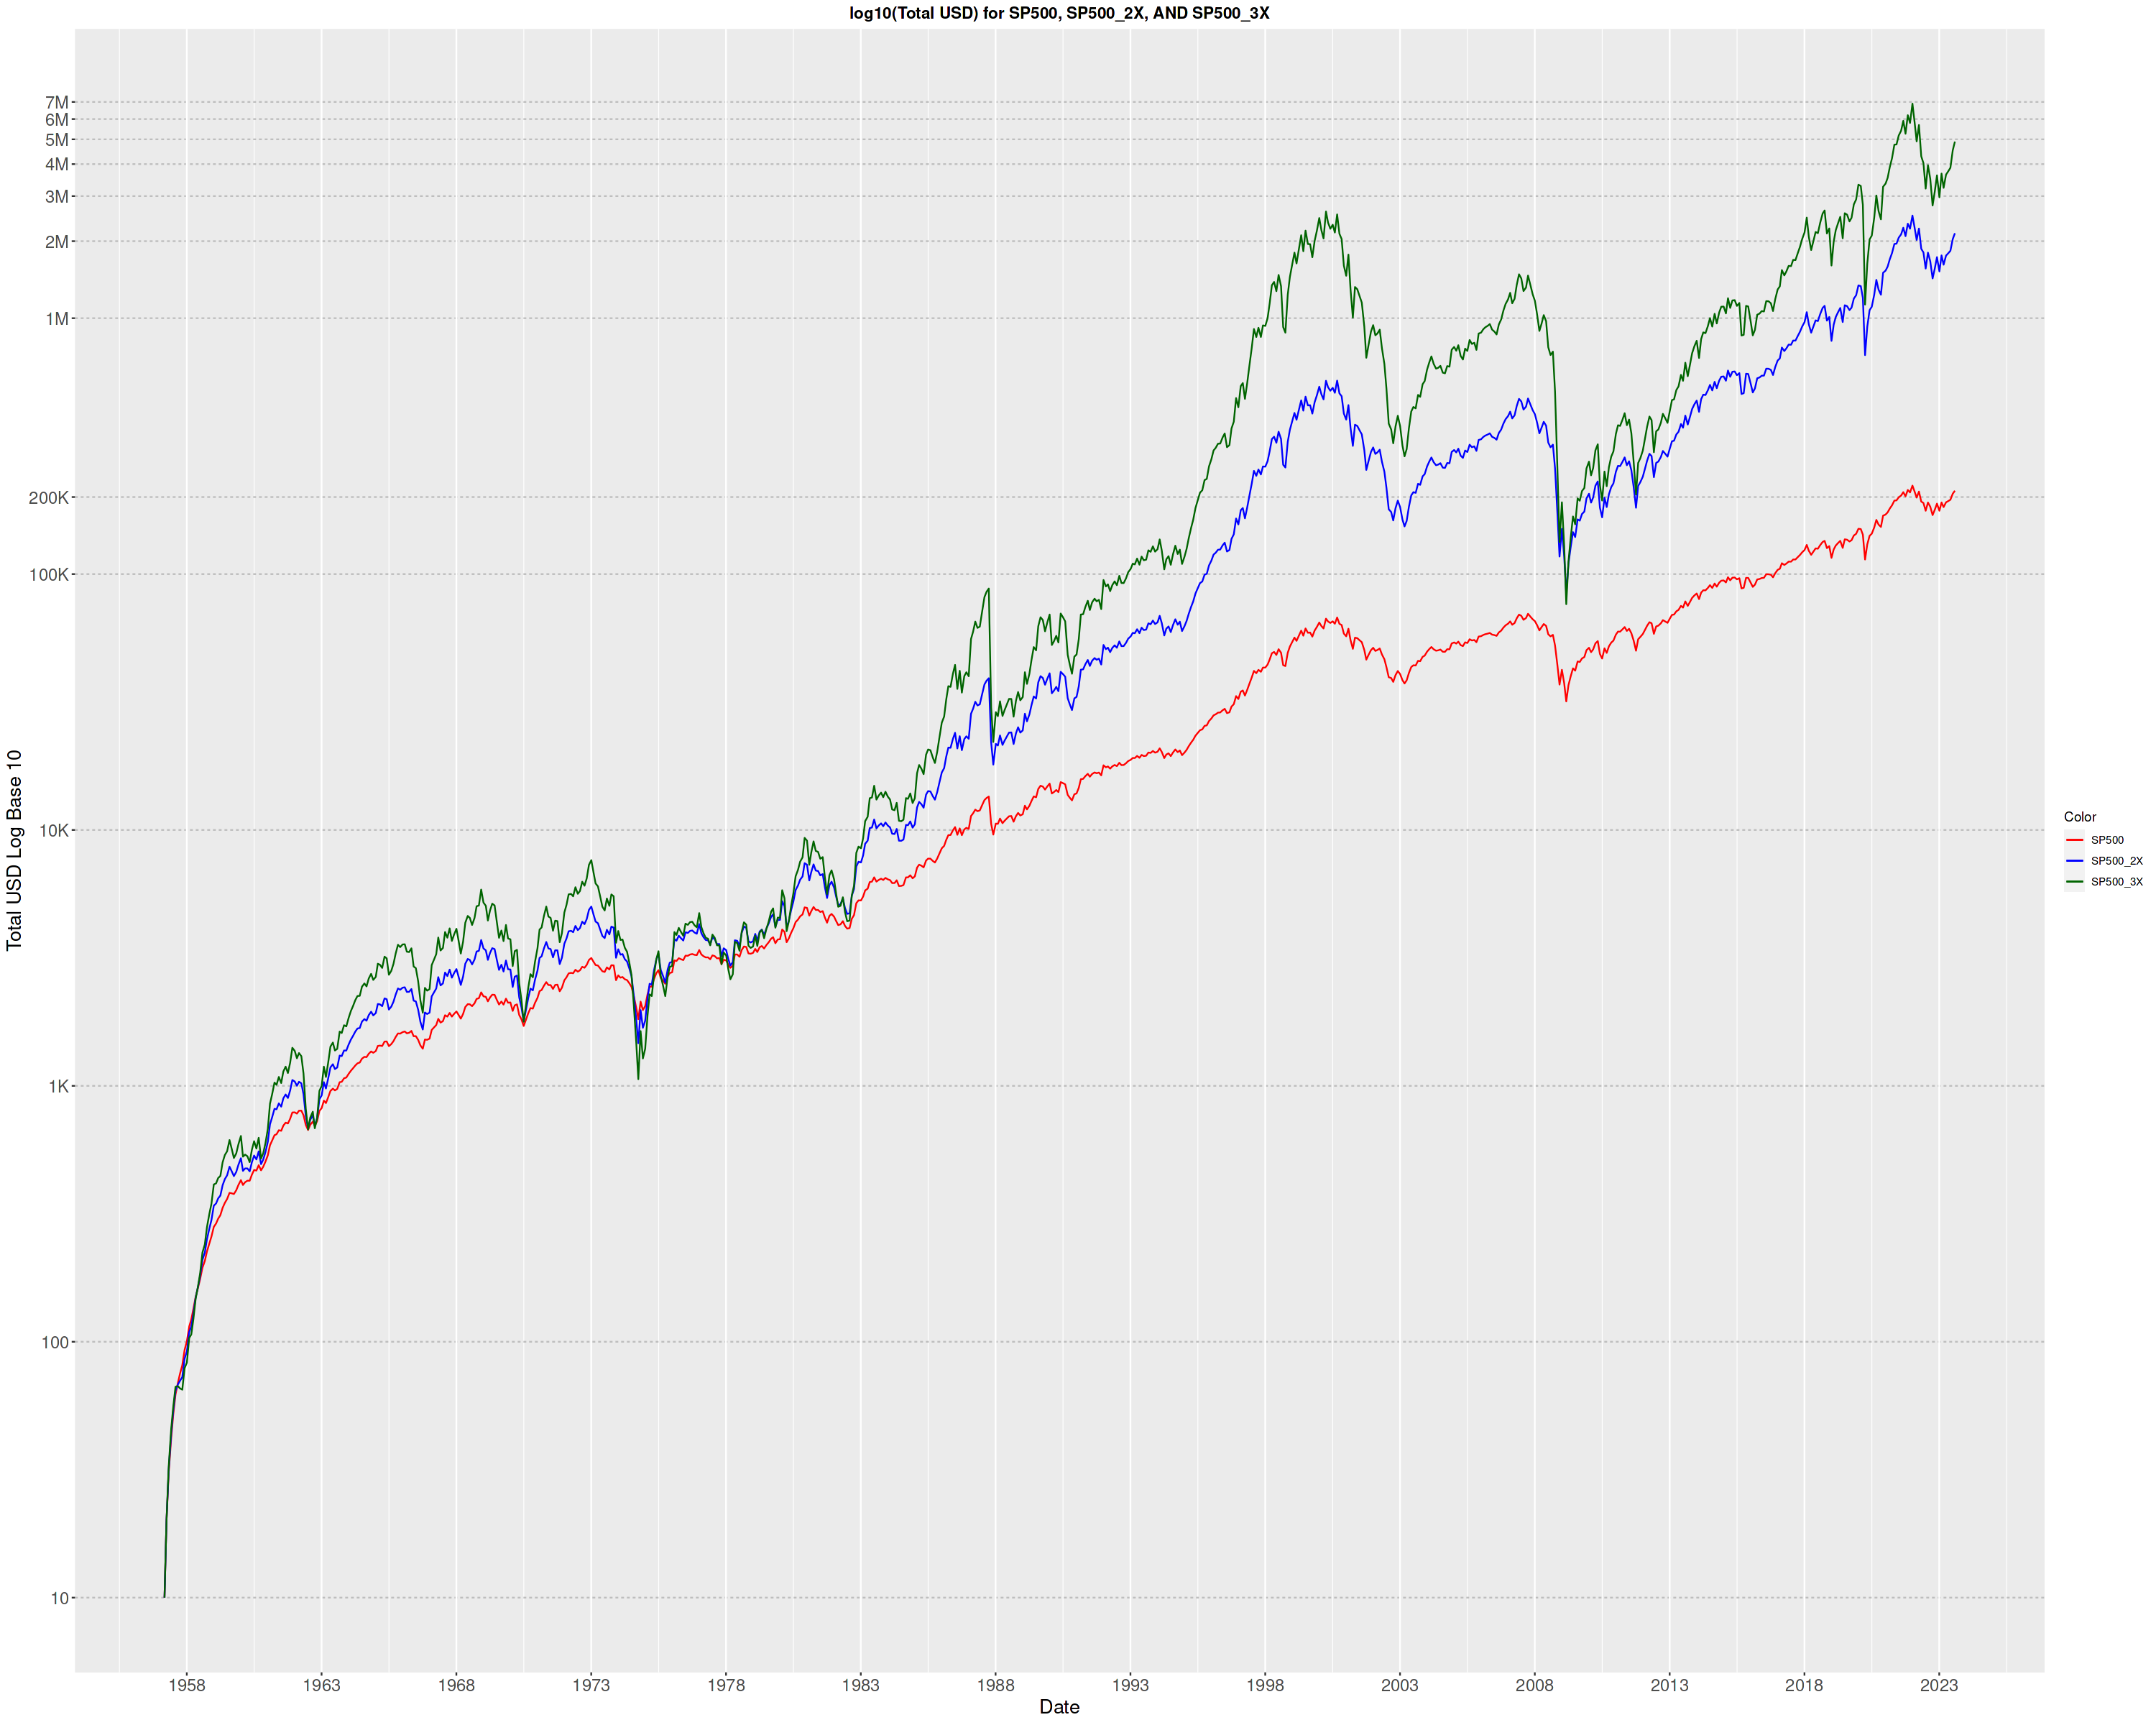

In [110]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_ALL_plot_log10)

### Latest Total USD Value For S&P 500 (1X, 2X, 3X).
#### Latest Total USD Value For 1X S&P 500.

In [111]:
#big.mark argument specifies the character to use as the separator for thousands
#digits argument specifies the number of decimal places to display
comma_format <- function(x) {
  comma(x, big.mark = ",", decimal.mark = ".", digits = 0)
}

In [112]:
#return the date and Total_USD_SP500 value from the last row
Total_USD_SP500_latest <- SP500_ALL[nrow(SP500_ALL), c("Date", "Total_USD_SP500")]
# Format the Total_USD_SP500_latest value with commas and periods
Total_USD_SP500_latest_formatted <- comma_format(Total_USD_SP500_latest$Total_USD_SP500)
# Format the date in the Total_USD_SP500_latest data frame as a string in the format "YYYY-MM-DD"
Total_USD_SP500_latest_date <- format(Total_USD_SP500_latest$Date, "%Y-%m-%d")
# Print the formatted date and Total_USD_SP500_latest value to the console with the desired format
cat("Date Total_USD_SP500\n", Total_USD_SP500_latest_date, " ", Total_USD_SP500_latest_formatted, "\n")

Warning message:
“The `digits` argument of `comma()` is deprecated as of scales 1.0.0.
ℹ Please use the `accuracy` argument instead.”


Date Total_USD_SP500
 2023-08-01   211,698 


#### Latest Total USD Value For S&P 500 2X.

In [113]:
#return the date and Total_USD_SP5002X value from the last row
Total_USD_SP5002X_latest <- SP500_ALL[nrow(SP500_ALL), c("Date", "Total_USD_SP5002X")]
# Format the Total_USD_SP5002X_latest value with commas and periods
Total_USD_SP5002X_latest_formatted <- comma_format(Total_USD_SP5002X_latest$Total_USD_SP5002X)
# Format the date in the Total_USD_SP5002X_latest data frame as a string in the format "YYYY-MM-DD"
Total_USD_SP5002X_latest_date <- format(Total_USD_SP5002X_latest$Date, "%Y-%m-%d")
# Print the formatted date and Total_USD_SP5002X_latest value to the console with the desired format
cat("Date Total_USD_SP5002X\n", Total_USD_SP5002X_latest_date, " ", Total_USD_SP5002X_latest_formatted, "\n")

Date Total_USD_SP5002X
 2023-08-01   2,147,701 


#### Latest Total USD Value for S&P 500 3X.

In [114]:
#return the date and Total_USD_SP5003X value from the last row
Total_USD_SP5003X_latest <- SP500_ALL[nrow(SP500_ALL), c("Date", "Total_USD_SP5003X")]
# Format the Total_USD_SP5003X_latest value with commas and periods
Total_USD_SP5003X_latest_formatted <- comma_format(Total_USD_SP5003X_latest$Total_USD_SP5003X)
# Format the date in the Total_USD_SP5003X_latest data frame as a string in the format "YYYY-MM-DD"
Total_USD_SP5003X_latest_date <- format(Total_USD_SP5003X_latest$Date, "%Y-%m-%d")
# Print the formatted date and Total_USD_SP5003X_latest value to the console with the desired format
cat("Date Total_USD_SP5003X\n", Total_USD_SP5003X_latest_date, " ", Total_USD_SP5003X_latest_formatted, "\n")

Date Total_USD_SP5003X
 2023-08-01   4,897,876 


### Total Number of Months and Years With Lowest USD Value For Each ETF
Latest leverage ETF's values are higher than the 1X S&P 500's value. But<br>
is it always the case that the leverage ETF's values are higher than the<br>
1X S&P 500's value? Let's find out.

Sum counts the number of months on which SP500 is lowest in USD value for<br>
that month. Returns number of months that SP500 is lowest in USD value<br>
for that month.

In [115]:
Count_Months_SP500_ALL <- data.frame(
  NumMonths_LowestUSD_SP500 = sum(SP500_ALL$Total_USD_SP500 < SP500_ALL$Total_USD_SP5002X & SP500_ALL$Total_USD_SP500 < SP500_ALL$Total_USD_SP5003X),
  NumMonths_LowestUSD_SP5002X = sum(SP500_ALL$Total_USD_SP5002X < SP500_ALL$Total_USD_SP500 & SP500_ALL$Total_USD_SP5002X < SP500_ALL$Total_USD_SP5003X),
  NumMonths_LowestUSD_SP5003X = sum(SP500_ALL$Total_USD_SP5003X < SP500_ALL$Total_USD_SP500 & SP500_ALL$Total_USD_SP5003X < SP500_ALL$Total_USD_SP5002X)
)

Divide each column in Count_Months_SP500_ALL by 12 to get the number of years.
Returns number of years that SP500 is lowest in USD value for that month.

In [116]:
Count_Years_SP500_ALL <- Count_Months_SP500_ALL / 12

Total number of months in which each ETF had the lowest USD value.

In [117]:
head(Count_Months_SP500_ALL)

,NumMonths_LowestUSD_SP500,NumMonths_LowestUSD_SP5002X,NumMonths_LowestUSD_SP5003X
,<int>,<int>,<int>
1,771,0,26


Total number of years in which each ETF had the lowest USD value.

In [118]:
head(Count_Years_SP500_ALL)

,NumMonths_LowestUSD_SP500,NumMonths_LowestUSD_SP5002X,NumMonths_LowestUSD_SP5003X
,<dbl>,<dbl>,<dbl>
1,64.25,0,2.166667


### Percent of Months and Years With Lowest USD Value For Each ETF

In [119]:
Total_Months_SP500_ALL <- Count_Months_SP500_ALL %>%
  summarise(Count_Months_SP500_ALL$NumMonths_LowestUSD_SP500 + Count_Months_SP500_ALL$NumMonths_LowestUSD_SP5002X + Count_Months_SP500_ALL$NumMonths_LowestUSD_SP5003X)
Percent_months_SP500_lowestUSD <- round((Count_Months_SP500_ALL$NumMonths_LowestUSD_SP500 / Total_Months_SP500_ALL)*100, digits = 2)
Percent_months_SP5002X_lowestUSD <- round((Count_Months_SP500_ALL$NumMonths_LowestUSD_SP5002X / Total_Months_SP500_ALL)*100, digits = 2)
Percent_months_SP5003X_lowestUSD <- round((Count_Months_SP500_ALL$NumMonths_LowestUSD_SP5003X / Total_Months_SP500_ALL)*100, digits = 2)

Percentage time in which 1X S&P 500 ETF had the lowest USD value.

In [120]:
print(Percent_months_SP500_lowestUSD)

   +...
1 96.74


Percentage time in which 2X S&P 500 ETF had the lowest USD value.

In [121]:
print(Percent_months_SP5002X_lowestUSD)

  +...
1    0


Percentage time in which 3X S&P 500 ETF had the lowest USD value.

In [122]:
print(Percent_months_SP5003X_lowestUSD)

  +...
1 3.26


1X S&P 500 ETF had the highest percentage time in which it had the lowest<br>
USD value at 96.73% of the time. 2X S&P 500 ETF had the lowest percentage<br>
time in which it had the lowest USD value at 0.00% of the time. 3X S&P<br>
500 ETF had the second highest percentage time in which it had the lowest<br>
USD value at 3.27% of the time.


### Calculate Beta for 2X S&P 500 and 3X S&P 500.
Beta is a measure of a stock's volatility in relation to the overall<br>
market. It is used to determine the risk of a stock or portfolio in<br>
relation to the market as a whole. A beta of 1 indicates that the stock's<br>
price will be just as volatile as the market, while a beta greater than 1<br>
indicates that the stock is more volatile than the market, and a beta<br>
less than 1 indicates that the stock is less volatile than the market.<br>
Note that ETF's are not stocks, but they are traded like stocks. Beta<br>
can be applied just as well to ETF's as it can to stocks.

Select the Date and SP500_DailyPercent for Beta calculation.

In [123]:
SP500_USD_Beta_Select <- Lev_Percent_df %>%
  select(Date, SP500_DailyPercent)

SSO_USD_Beta_Select <- Lev_Percent_df %>% 
  select(Date, SP500_2X_DailyPercent)

UPRO_USD_Beta_Select <- Lev_Percent_df %>% 
  select(Date, SP500_3X_DailyPercent)

Create a new variable with the converted date values

In [124]:
SP500_date_covert <- as.POSIXct(SP500_USD_Beta_Select$Date)
SSO_date_covert <- as.POSIXct(SSO_USD_Beta_Select$Date)
UPRO_date_covert <- as.POSIXct(UPRO_USD_Beta_Select$Date)

Convert SP500_data_clean to xts using the new date variable.

In [125]:
SP500_xts <- xts(SP500_USD_Beta_Select$SP500_DailyPercent, order.by = SP500_date_covert)
SSO_xts <- xts(SSO_USD_Beta_Select$SP500_2X_DailyPercent, order.by = SSO_date_covert)
UPRO_xts <- xts(UPRO_USD_Beta_Select$SP500_3X_DailyPercent, order.by = UPRO_date_covert)

Calculate beta using the CAPM.beta().

In [126]:
Beta_SSO <- round(CAPM.beta(SSO_xts, SP500_xts),2)
Beta_UPRO <- round(CAPM.beta(UPRO_xts, SP500_xts),2)

Beta_SSO and Beta_UPRO

In [127]:
Beta_SSO_UPRO <- data.frame(Beta_SSO, Beta_UPRO)

In [128]:
print(Beta_SSO_UPRO)

  Beta_SSO Beta_UPRO
1     1.97      2.97


Suprisingly, but at the same time not suprisingly. Beta for SSO is 1.97<br>
and Beta for UPRO is 2.97. Which is the same as the median leverage for<br>
SSO and UPRO. This means that leverage is the same as the beta. Thus, 2X<br>
S&P 500 ETF is about twice as volatile as the 1X S&P 500 and 3X S&P 500<br>
ETF is about three times as volatile as the 1X S&P 500.

## Act
Act is the last step in the data analysis process. Act is when you give<br>
high-level recommendations based on the analysis.

### Conclusion
It is often discussed that one should not invest in leveraged ETFs for<br>
long periods of time. The argument is as follows: "If you invest in a<br>
leveraged ETF for a long period of time, you will lose money because of<br>
the daily rebalancing." The first argument is true, but only in the short<br>
term. The market has a slight positive bias over the long term. Therefore,<br>
over the long term, positive upward bias will compensate for the loss by<br>
daily rebalancing.<br>

Another common argument is that, "if you invest a lump sum amount of<br>
money in a leveraged ETF and the market goes down Y percent, it will take<br>
longer to recover than if you invested in a non-leveraged ETF." The<br>
second argument is also true, but most active investors do not invest a<br>
lump sum amount of money into an ETF, then never invest again. It is more<br>
financially prudent to invest by dollar cost averaging. Dollar cost<br>
averaging is when you invest a fixed amount of money at regular intervals<br>
over a long period of time. Dollar cost averaging mediates risk by<br>
spreading out your investment over time. Rather than investing a lump sum<br>
amount of money at one time. Dollar cost averaging has a compounding<br>
effect on your investment. Add the positive bias with the compounding<br>
effect of dollar cost averaging and leverage S&P 500 ETF's outperform<br>
non-leverage ETF's over the long term.<br>  

The investment start date is March 5, 1957. Which aligns with the<br>
introduction of the S&P 500 index. From 1957 to 2023, the non-leverage<br>
S&P 500 ETF had the lowest USD value 90 plus percent of the time. The 2X<br>
leverage S&P 500 ETF had the lowest USD value 0 percent of the time. The<br>
3X leverage S&P 500 ETF had the lowest USD value less than 10 percent of<br>
the time. Note that this is monthly data. Which means that at the<br>
beginning of each month, the 1X S&P 500 ETF had the lowest USD value 90<br>
plus percent of the time. At the beginning of each month, the 2X leverage<br>
S&P 500 ETF had the lowest USD value 0 percent of the time. At the<br>
beginning of each month, the 3X leverage S&P 500 ETF had the lowest USD<br>
value less than 10 percent of the time. Therefore, if an investor is<br>
indifferent by how much they want to outperform the market, but wants to<br>
outperform the market most of the investment time, then the 2X S&P 500<br>
leverage ETF is the way to go. If an investor wants to have the highest<br>
return with the rare risk of a below than average market return at a<br>
small part of the investment time, then the 3X S&P 500 leverage ETF is<br>
the way to go.<br>

Risk factor to consider. Prices for leverage S&P 500 ETF's are not based<br>
on actual historical data for leverage S&P 500 ETF's, as leverage S&P 500<br>
ETF's did not exist when the S&P 500 index was created. Therefore, in<br>
this analysis, leverage S&P 500 ETF's are based on a simple mathematical<br>
model. Since leverage S&P 500 ETF's rebalance daily. Each day has a<br>
slightly different leverage. This slight difference in leverage can cause<br>
the leverage S&P 500 ETF's to deviate from the target leverage of 2X and<br>
3X. Thus, to simulate leverage S&P 500 ETF's, the median leverage from<br>
SSO and UPRO was used. The median leverage for SSO is 1.97 and the median<br>
leverage for UPRO is 2.97. Median leverage is then multiplied by the S&P<br>
500 daily return to simulate the daily return for leverage S&P 500 ETF's.<br>
This simple mathematical model is an approximation of the actual daily<br>
return for leverage S&P 500 ETF's. The approximation is not perfect, but<br>
it is close enough to provide a good estimate of the daily return for<br>
leverage S&P 500 ETF's. If the client is not comfortable with this<br>
approximation, then at the request of the client. More complex<br>
mathematical models can be used to simulate the daily return for leverage<br>
S&P 500 ETF's.<br>

What if the 1X S&P 500 drops more than 33.33%? For a 3X leverage S&P 500.<br>
A drop of more than 33.33% would wipe out the leverage 3X leverage S&P 500.<br>
That would be true if it happens, but if the 1X S&P 500 index drops more<br>
than 20%. Circuit breakers halt trading for the remainder of the day.<br>
Assuming a hypothetical scenario where 3X leverage S&P 500 starts at some<br>
Y price level. Set that Y price level to 100%. The 1X S&P 500 would have<br>
to drop 20% for 9 straight trading days before price level for 3X<br>
leverage S&P 500 drops to about 1%. The 1X S&P 500 dropping 20% for 9<br>
straight trading days has never happened. Though not completely<br>
impossible, but it would have to be some truly apocalyptic event for the<br>
1X S&P 500 to drop 20% for 9 straight trading days. Therefore,<br>
notwithstanding an asteroid strike, nuclear war, or some other<br>
cataclysmic event that could cause 1X S&P 500 to drop 20% for 9 straight<br>
trading days. I assume that 3X leverage S&P 500 to be safe from complete<br>
liquidation by extreme negative drops. If the 3X leverage S&P 500 can<br>
survive extreme drops, then it follows that the 2X can also survive<br>
extreme negative drops in the stock market.<br> 

To conclude, 3X leverage ETF provide the highest return, followed by 2X<br>
leverage ETF and then 1X ETF. However, 3X leverage ETF also provide the<br>
highest volatility, followed by 2X leverage ETF, and then 1X ETF. 3X<br>
leverage ETF are about three times as volatile as the S&P 500 and 2X<br>
leverage ETF are about twice as volatile as the S&P 500. 1X ETF are about<br>
as volatile as the S&P 500 index. 3X leverage ETF are the best choice for<br>
investors who are willing to take on the highest volatility for the<br>
highest return. 2X leverage ETF are the best choice for investors who are<br>
willing to take on a moderate volatility for a moderate return. 1X ETF<br>
are the best choice for investors who are willing to take on the lowest<br>
volatility for the lowest return.<br>

FIN.<br>

References<br>

Cooper, Tony, Alpha Generation and Risk Smoothing Using Managed Volatility (August 25, 2010).<br>
    Available at SSRN: https://ssrn.com/abstract=1664823 or http://dx.doi.org/10.2139/ssrn.1664823

The Vanguard Group. (n.d.). Market volatility regulations. Vanguard.<br>
    https://personal.vanguard.com/us/content/Funds/FundsToolsCircuitBreakersJSP.jsp<br>

Valetkevitch, C. (2013, April 10). TIMELINE-Key dates and milestones in the S&P 500’s history. U.S.<br>
    https://www.reuters.com/article/usa-stocks-sp-timeline/timeline-key-dates-and-milestones-in-the-sp-500s-history-idUSL2N0CX13620130410<br>